In [1]:
!pip install ultralytics datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import libraries
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from glob import glob
import random
import numpy as np
from IPython.display import display
from datasets import load_dataset, Dataset, DatasetDict
from PIL import Image
from sklearn.model_selection import train_test_split
import albumentations as A

from torch.utils.data import DataLoader
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Base path to dataset
base_path = "/content/drive/MyDrive/comp4471_final"

In [5]:
# Load dataset
ds = load_dataset("EduardoPacheco/FoodSeg103")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/351M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/115M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4983 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2135 [00:00<?, ? examples/s]

In [6]:
# Separate splits to train and validation set
train_dataset = ds["train"]
val_dataset = ds["validation"]

In [7]:
# Get dataset information
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'classes_on_image', 'id'],
        num_rows: 4983
    })
    validation: Dataset({
        features: ['image', 'label', 'classes_on_image', 'id'],
        num_rows: 2135
    })
})


In [8]:
ingredients = np.array(
    [
        "background",
        "candy",
        "egg tart",
        "french fries",
        "chocolate",
        "biscuit",
        "popcorn",
        "pudding",
        "ice cream",
        "cheese butter",
        "cake",
        "wine",
        "milkshake",
        "coffee",
        "juice",
        "milk",
        "tea",
        "almond",
        "red beans",
        "cashew",
        "dried cranberries",
        "soy",
        "walnut",
        "peanut",
        "egg",
        "apple",
        "date",
        "apricot",
        "avocado",
        "banana",
        "strawberry",
        "cherry",
        "blueberry",
        "raspberry",
        "mango",
        "olives",
        "peach",
        "lemon",
        "pear",
        "fig",
        "pineapple",
        "grape",
        "kiwi",
        "melon",
        "orange",
        "watermelon",
        "steak",
        "pork",
        "chicken duck",
        "sausage",
        "fried meat",
        "lamb",
        "sauce",
        "crab",
        "fish",
        "shellfish",
        "shrimp",
        "soup",
        "bread",
        "corn",
        "hamburg",
        "pizza",
        "hanamaki baozi",
        "wonton dumplings",
        "pasta",
        "noodles",
        "rice",
        "pie",
        "tofu",
        "eggplant",
        "potato",
        "garlic",
        "cauliflower",
        "tomato",
        "kelp",
        "seaweed",
        "spring onion",
        "rape",
        "ginger",
        "okra",
        "lettuce",
        "pumpkin",
        "cucumber",
        "white radish",
        "carrot",
        "asparagus",
        "bamboo shoots",
        "broccoli",
        "celery stick",
        "cilantro mint",
        "snow peas",
        "cabbage",
        "bean sprouts",
        "onion",
        "pepper",
        "green beans",
        "French beans",
        "king oyster mushroom",
        "shiitake",
        "enoki mushroom",
        "oyster mushroom",
        "white button mushroom",
        "salad",
        "other ingredients",
    ]
)

Shape of training dataset: (4883, 4) 
Shape of validation dataset: (2035, 4)
Shape of test dataset: (200, 4)


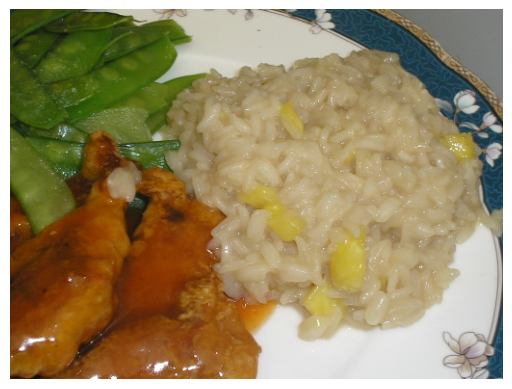

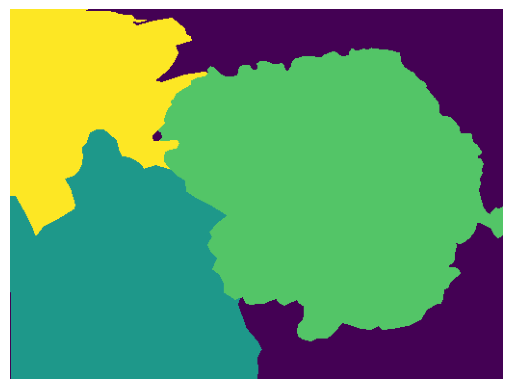

background
chicken duck
rice
snow peas


In [ ]:
# Print sample items from dataset
print(
    f"Shape of training dataset: {train_dataset.shape} \nShape of validation dataset: {val_dataset.shape}\nShape of test dataset: {test_dataset.shape}"
)
# Display the image
image = train_dataset[0]["image"]
plt.imshow(image)
plt.axis("off")  # Turn off axis labels
plt.show()

# Display the label
label = train_dataset[0]["label"]
plt.imshow(label)
plt.axis("off")  # Turn off axis labels
plt.show()

# Print ingredient name according to the label
for index in train_dataset[0]["classes_on_image"]:
    if index < len(ingredients):
        print(ingredients[index])

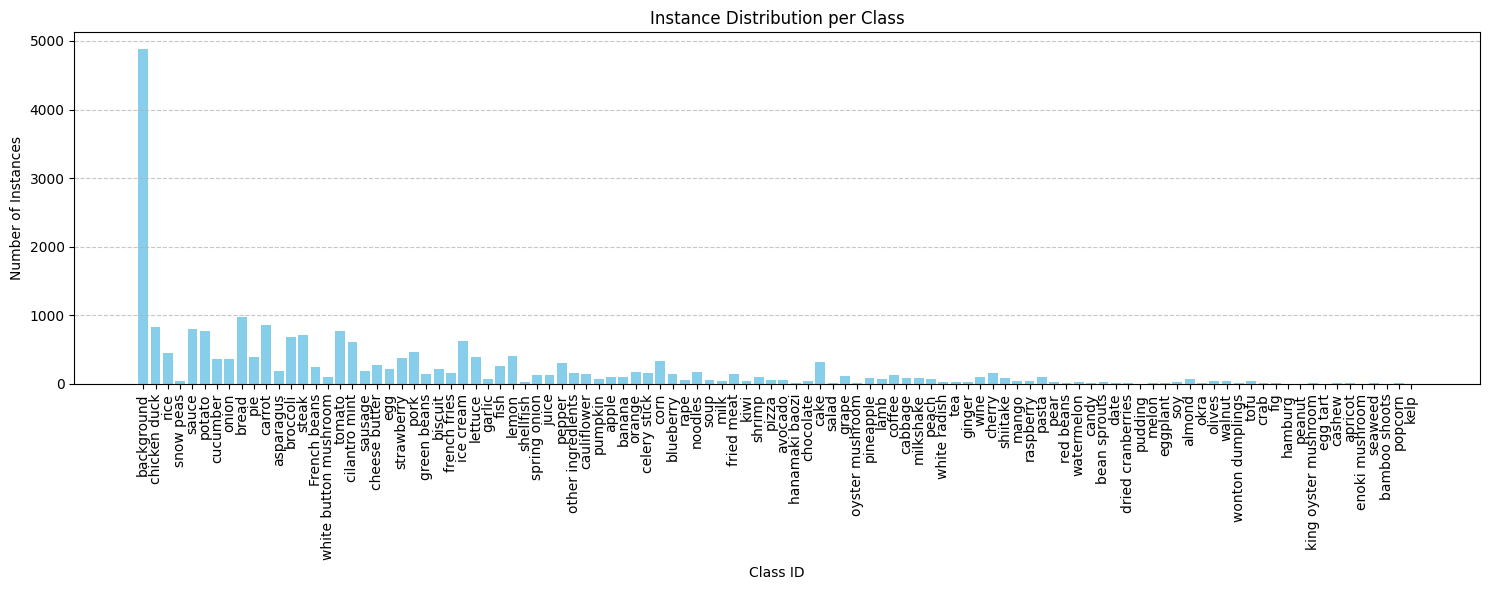

Class Distribution Summary:
           Class ID  Count
0        background   4882
1      chicken duck    824
2              rice    450
3         snow peas     47
4             sauce    798
..              ...    ...
99   enoki mushroom      5
100         seaweed      7
101   bamboo shoots      3
102         popcorn     10
103            kelp      1

[104 rows x 2 columns]


In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Check if the labels directory exists
if not ds:
    print("Database is not loaded!")
else:
    # Counter for class occurrences
    class_counter = Counter()

    # Iterate over each train item to add to counter
    for item in train_dataset:
        for class_id in item["classes_on_image"]:
            class_counter[ingredients[class_id]] += 1
    # Plotting the distribution
    classes, counts = zip(*(class_counter.items()))

    plt.figure(figsize=(15, 6))
    plt.bar(classes, counts, color="skyblue")
    plt.xlabel("Class ID")
    plt.ylabel("Number of Instances")
    plt.title("Instance Distribution per Class")
    plt.xticks(rotation=90)

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

class_summary = [
    {"Class ID": class_id, "Count": count} for class_id, count in class_counter.items()
]
class_summary_df = pd.DataFrame(class_summary)
print("Class Distribution Summary:")
print(class_summary_df)

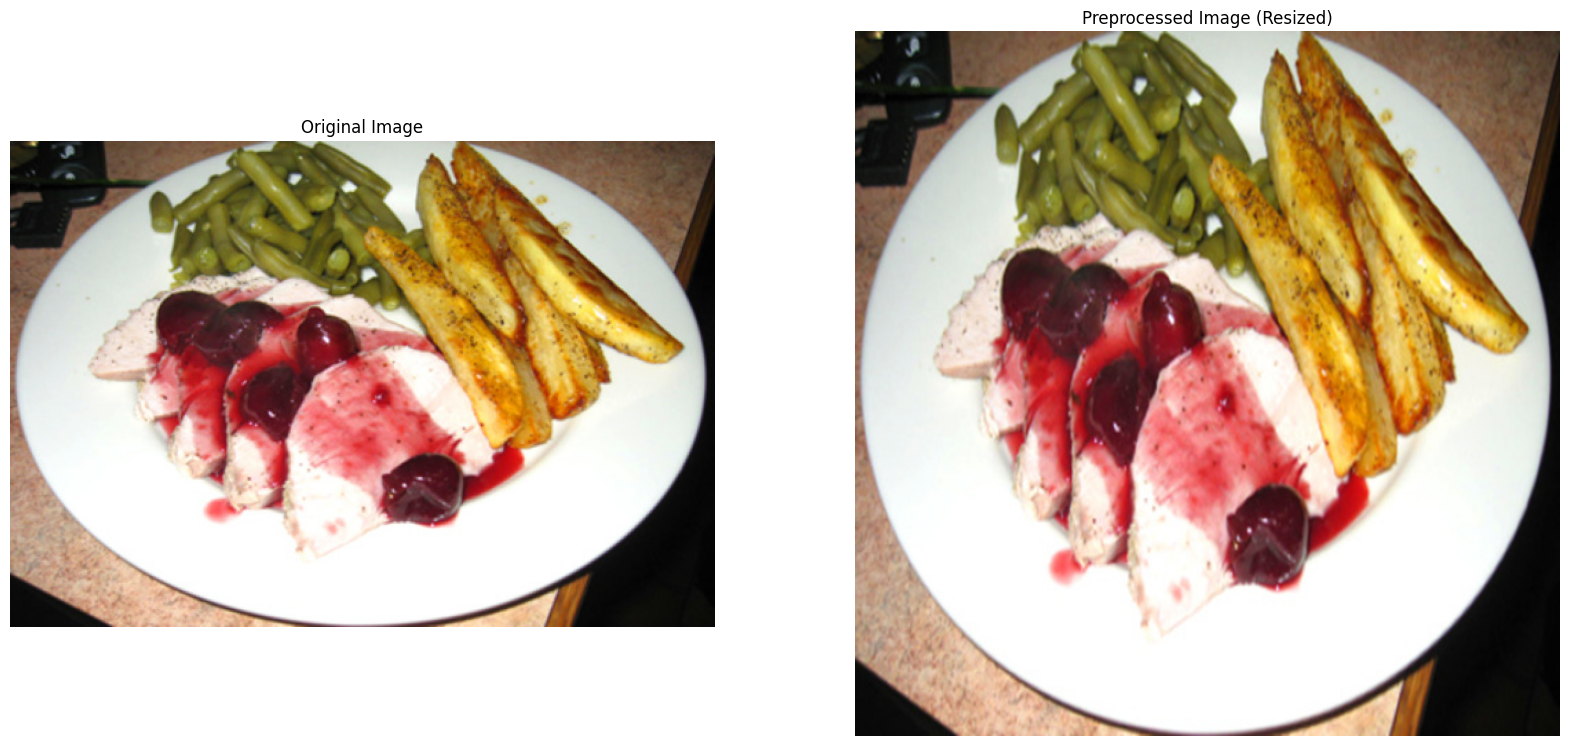

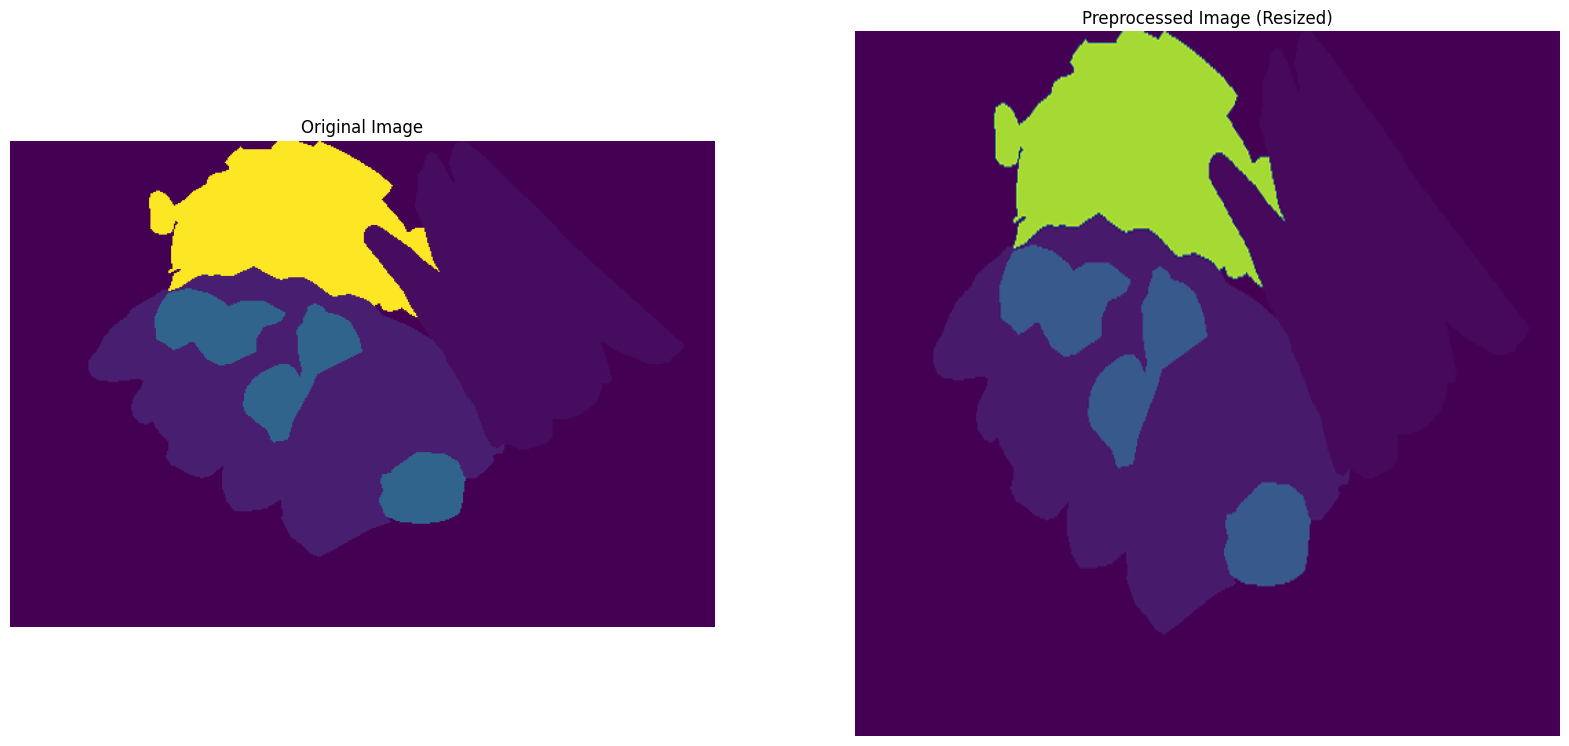

In [ ]:
def preprocess_image(original_image, size=(640, 640)):
    # Resize image
    preprocessed_image = original_image.resize(size)

    # Convert to NumPy array
    preprocessed_image = np.array(preprocessed_image)

    # Normalize image
    preprocessed_image = preprocessed_image / 255.0  # Scale to [0, 1]
    return original_image, preprocessed_image


def preprocess_mask(original_mask, size=(640, 640)):
    # Resize mask
    preprocessed_mask = original_mask.resize(size)  # Use nearest for masks

    # Convert to NumPy array
    preprocessed_mask = np.array(preprocessed_mask)

    # Normalize image
    preprocessed_mask = preprocessed_mask / 255.0  # Scale to [0, 1]

    return original_mask, preprocessed_mask


def plot_preprocessing_comparison(image, mask=False):
    if mask:
        original, preprocessed = preprocess_mask(image)
    else:
        original, preprocessed = preprocess_image(image)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed)
    plt.title("Preprocessed Image (Resized)")
    plt.axis("off")

    plt.show()


# Visualize preprocessing on a random training image
sample = random.choice(train_dataset)
plot_preprocessing_comparison(sample["image"])
plot_preprocessing_comparison(sample["label"], mask=True)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


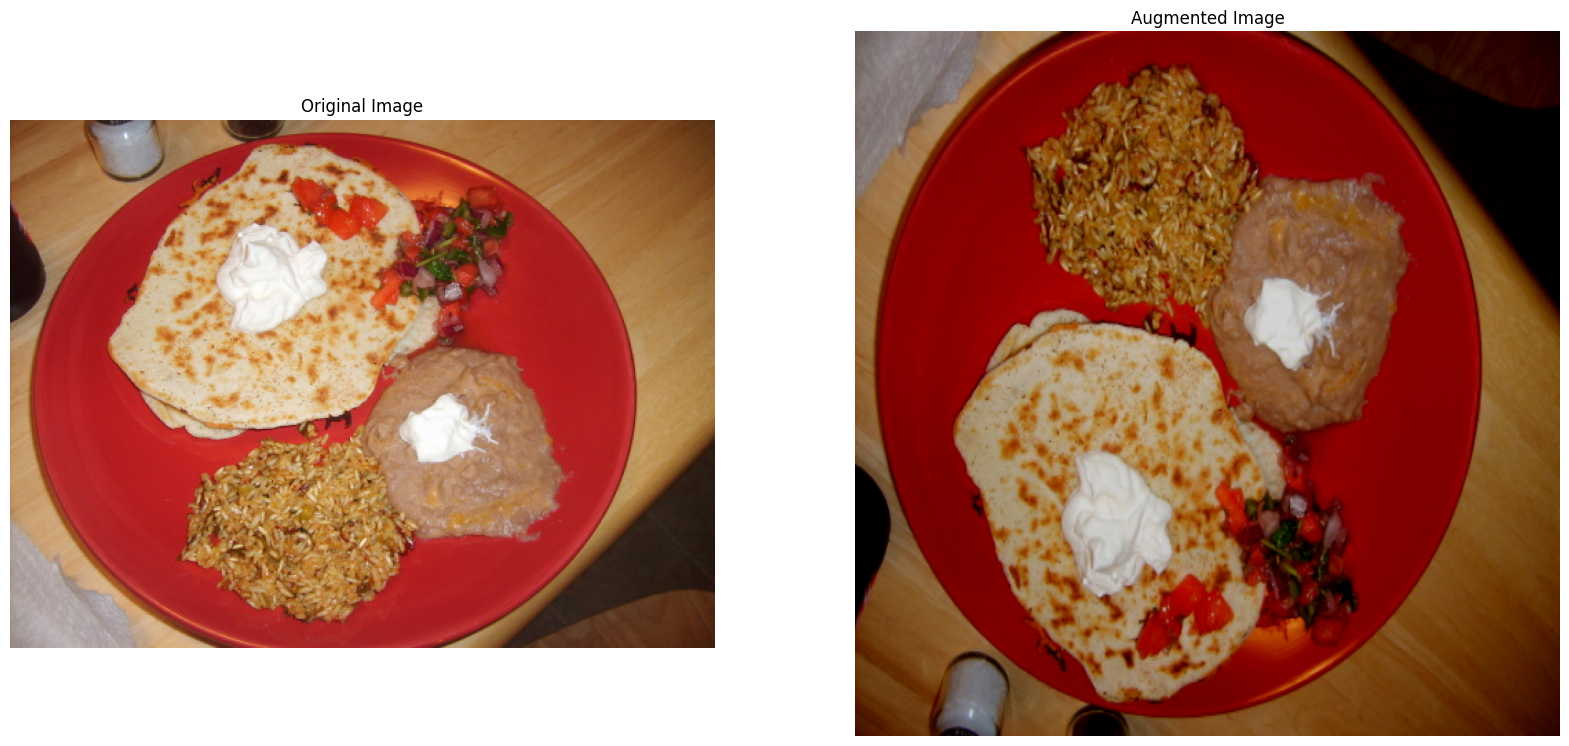

In [ ]:
# Add data augmentation
# Define data augmentation transformations
import albumentations as A


def random_data_augmentation(image, mask=None):
    # Define the augmentation pipeline
    augmentation = A.Compose(
        [
            A.HorizontalFlip(p=0.5),  # Flip images horizontally
            A.VerticalFlip(p=0.5),  # Flip images vertically
            A.RandomRotate90(p=0.5),  # Rotate images by 90 degrees
            A.RandomBrightnessContrast(
                brightness_limit=0.25,  # Limits for brightness adjustment
                contrast_limit=0.2,  # Limits for contrast adjustment
                p=0.5,  # Apply with a probability of 0.5
            ),
            A.ShiftScaleRotate(
                shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5
            ),
            A.Resize(height=640, width=640),  # Resize images
            A.Normalize(
                mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)
            ),  # Normalizing to [0, 1]
        ],
        p=1.0,
    )  # Apply all augmentations with a probability of 1.0

    # Apply the augmentations
    if mask is not None:
        augmented = augmentation(image=image, mask=mask)
        return augmented["image"], augmented["mask"]
    else:
        augmented = augmentation(image=image)
        return augmented["image"]


def show_random_data_augmentation(ds):
    # Sample random image and mask from your dataset
    sample = random.choice(ds)
    image = np.array(sample["image"])  # Convert PIL to NumPy array
    mask = np.array(sample["label"])  # Convert mask to NumPy array if available

    # Apply random data augmentation
    # augmented_image, augmented_mask = random_data_augmentation(image, mask)
    augmented_image = random_data_augmentation(image)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 2)
    plt.title("Augmented Image")
    plt.imshow(augmented_image)
    plt.axis("off")
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.show()


show_random_data_augmentation(train_dataset)

# Training


In [ ]:
import numpy as np
import cv2
from PIL import Image
import os


def process_sample(image, mask, classes_on_image, img_id, output_dir):
    # Convert Pillow images to NumPy arrays
    img_np = np.array(image)
    mask_np = np.array(mask)
    height, width = mask_np.shape

    # Prepare output paths
    img_path = os.path.join(output_dir, "images", f"{img_id}.jpg")
    label_path = os.path.join(output_dir, "labels", f"{img_id}.txt")

    # Save image as JPEG
    Image.fromarray(img_np).save(img_path)

    # Generate annotations
    annotations = []
    for class_id in classes_on_image:
        # Create binary mask for this class
        binary_mask = (mask_np == class_id).astype(np.uint8)

        # Find connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(
            binary_mask, connectivity=8
        )

        # Process each component (skip label 0, background of binary mask)
        for label in range(1, num_labels):
            component_mask = (labels == label).astype(np.uint8)
            contours, _ = cv2.findContours(
                component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
            )

            if contours:
                contour = contours[0]  # Take the largest contour
                if len(contour) >= 3:  # Minimum points for a polygon
                    # Normalize coordinates
                    contour_flat = contour.reshape(-1, 2) / [width, height]
                    contour_str = " ".join(
                        [f"{x:.6f} {y:.6f}" for x, y in contour_flat]
                    )
                    annotations.append(
                        f"{class_id} {contour_str}"
                    )  # Adjust class_id to 0-based

    # Save annotations to text file
    os.makedirs(os.path.dirname(label_path), exist_ok=True)
    with open(label_path, "w") as f:
        f.write("\n".join(annotations))


# directory structure
data_dir = "foodseg103_yolo"
for split, ds in [("train", train_dataset), ("val", val_dataset)]:
    img_dir = os.path.join(base_path, data_dir, split, "images")
    label_dir = os.path.join(base_path, data_dir, split, "labels")
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)

    for sample in ds:
        process_sample(
            sample["image"],
            sample["label"],
            sample["classes_on_image"],
            sample["id"],
            os.path.join(base_path, data_dir, split),
        )

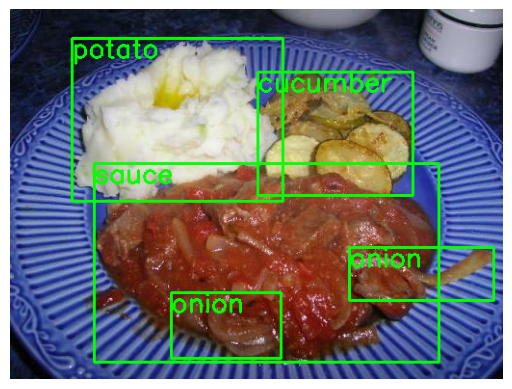

In [ ]:
def draw_bounding_boxes(image_path, label_path, class_names=None):
    """
    Draws bounding boxes on an image based on instance annotations from process_sample.

    Parameters:
    - image_path: str, path to the image file (e.g., 'path/to/image.jpg').
    - label_path: str, path to the annotation text file (e.g., 'path/to/labels.txt').
    - class_names: list of str, optional, names of classes for labeling (e.g., ['class1', 'class2']).

    Returns:
    - None: Displays the image with bounding boxes and optionally saves it.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")
    height, width = image.shape[:2]

    # Read the annotation file
    try:
        with open(label_path, "r") as f:
            annotations = f.readlines()
    except FileNotFoundError:
        raise FileNotFoundError(f"Annotation file not found at: {label_path}")

    # Process each annotation
    for annotation in annotations:
        parts = annotation.strip().split()
        if len(parts) < 3:  # Must have at least class_id and one (x, y) pair
            continue

        # Extract class ID and contour points
        class_id = int(parts[0])
        if class_id != 0:
            contour = []
            for i in range(1, len(parts), 2):
                try:
                    x = float(parts[i]) * width  # Denormalize x coordinate
                    y = float(parts[i + 1]) * height  # Denormalize y coordinate
                    contour.append([x, y])
                except IndexError:
                    break  # Incomplete pair, stop processing this annotation
            if not contour:
                continue

            # Convert contour to numpy array and compute bounding box
            contour = np.array(contour, dtype=np.int32)
            x, y, w, h = cv2.boundingRect(contour)

            # Draw bounding box on the image
            color = (0, 255, 0)  # Green color in BGR
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

            # Optionally, draw class label if class_names provided
            if (
                class_names is not None
                and len(class_names) > 0
                and class_id < len(class_names)
            ):
                label = class_names[class_id]
                cv2.putText(
                    image, label, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2
                )

    # Display the image
    # Convert image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")  # Turn off axis for a cleaner display
    plt.show()


# Example usage
image_path = os.path.join(base_path, "foodseg103_yolo/train/images/1.jpg")
label_path = os.path.join(base_path, "foodseg103_yolo/train/labels/1.txt")
draw_bounding_boxes(image_path, label_path, ingredients)

In [ ]:
def tune_hyperparameters(
    hyperparams_list,
    model_name="yolov8n-seg.pt",
    epochs=10,
    imgsz=640,
):
    """
    Tunes hyperparameters for a YOLOv8 model and returns the model with the highest result.

    Args:
        hyperparams_list (list): List of dictionaries, each containing hyperparameter settings.
        train_dataset (str): Path to the training dataset (assumed to be referenced in data.yaml).
        val_dataset (str): Path to the validation dataset (assumed to be referenced in data.yaml).
        model_name (str): Name or path of the YOLO model to initialize (default: "yolov8n-seg.pt").
        epochs (int): Number of training epochs (default: 10).
        imgsz (int): Image size for training (default: 640).

    Returns:
        YOLO: The trained model with the best performance based on validation mAP.
    """
    # Initialize variables to track the best performance
    map_results = []  # To store (label, best_map) for each setting

    # Iterate over each hyperparameter configuration
    for i, hyperparams in enumerate(hyperparams_list):
        print(f"Training run {i} with hyperparameters: {hyperparams}")

        # Initialize a fresh YOLO model for each run
        model = YOLO(model_name)

        # Train the model with the current hyperparameters
        # Results are saved in a unique directory: hyperparam_tuning/run_{i}
        model.train(
            data=os.path.join(
                base_path, "data.yaml"
            ),  # Assumes data.yaml is configured with train and val paths
            epochs=epochs,
            imgsz=imgsz,
            # project="hyperparam_tuning",
            name=f"run_{i}",
            verbose=False,
            **hyperparams,  # Unpack hyperparams dictionary into keyword arguments
        )

        metrics = model.val(data=os.path.join(base_path, "data.yaml"))

        # Exract mAP and f1 metrics
        map50 = metrics.box.map50
        map50_95 = metrics.box.map
        f1 = metrics.box.f1
        print(f"mAP@0.5:0.95: {map50_95}, F1: {f1}")

        map_results.append(
            {
                "hyperparameters": hyperparams,
                "mAP@0.5": map50,
                "mAP@0.5:0.95": map50_95,
                "F1": f1,
            }
        )

        print(
            f"Completed training run {i}: \nmAP@0.5: map50 \nmAP@0.5:0.95: {map50_95} \nF1: {f1}"
        )

    return map_results

In [ ]:
# Define hyperparameter configurations
hyperparameter_configs = [
    {
        "lr0": 0.01,
        "lrf": 0.01,
        "momentum": 0.937,
        "weight_decay": 0.0005,
        "warmup_epochs": 3.0,
        "warmup_momentum": 0.8,
        "warmup_bias_lr": 0.1,
        "box": 0.05,
        "cls": 0.5,
        "dfl": 1.0,
    },
    {
        "lr0": 0.005,
        "lrf": 0.02,
        "momentum": 0.9,
        "weight_decay": 0.0003,
        "warmup_epochs": 2.0,
        "warmup_momentum": 0.85,
        "warmup_bias_lr": 0.05,
        "box": 0.04,
        "cls": 0.6,
        "dfl": 1.2,
    },
    {
        "lr0": 0.001,
        "lrf": 0.02,
        "momentum": 0.95,
        "weight_decay": 0.0004,
        "warmup_epochs": 4.0,
        "warmup_momentum": 0.75,
        "warmup_bias_lr": 0.15,
        "box": 0.06,
        "cls": 0.4,
        "dfl": 0.9,
    },
    {
        "lr0": 0.00269,
        "lrf": 0.00288,
        "momentum": 0.73375,
        "weight_decay": 0.00015,
        "warmup_epochs": 1.22935,
        "warmup_momentum": 0.1525,
        "warmup_bias_lr": 0.1,
        "box": 18.27875,
        "cls": 1.32899,
        "dfl": 0.56016,
    },
    {
        "lr0": 0.002,
        "lrf": 0.02,
        "momentum": 0.9,
        "weight_decay": 0.001,
        "warmup_epochs": 2.5,
        "warmup_momentum": 0.85,
        "warmup_bias_lr": 0.05,
        "box": 0.03,
        "cls": 0.7,
        "dfl": 1.1,
    },
]

# Run hyperparameter tuning and training
results = tune_hyperparameters(
    hyperparams_list=hyperparameter_configs,
    model_name="yolov8n-seg.pt",
    epochs=10,
    imgsz=640,
)

Training run 0 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'dfl': 1.0}


100%|██████████| 6.74M/6.74M [00:00<00:00, 20.9MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/COMP4471/comp4471_project/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=run_0, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 3.41MB/s]

Overriding model.yaml nc=80 with nc=104

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

 22        [15, 18, 21]  1   1340584  ultralytics.nn.modules.head.Segment          [104, 32, 64, [64, 128, 256]] 
YOLOv8n-seg summary: 151 layers, 3,600,120 parameters, 3,600,104 gradients, 13.6 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 16.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.8±1.1 MB/s, size: 461.8 KB)


train: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 0.1±0.1 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to runs/segment/run_0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/run_0
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.11G   0.008142    0.02196      4.672     0.9932         54        640: 100%|██████████| 312/312 [02:07<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [04:03<00:00,  3.63s/it]


                   all       2135      19717      0.643     0.0198     0.0162     0.0118      0.643       0.02     0.0161     0.0109

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.41G   0.007543    0.01658      3.707     0.9581         58        640: 100%|██████████| 312/312 [01:19<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]


                   all       2135      19717      0.607     0.0546      0.037     0.0273      0.608     0.0544     0.0373     0.0257

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.04G   0.007553    0.01543      3.248     0.9582         62        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.85it/s]


                   all       2135      19717      0.628     0.0826     0.0633     0.0467      0.641     0.0783     0.0634     0.0444

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.26G   0.007322    0.01474      2.954     0.9367         67        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.79it/s]


                   all       2135      19717      0.551      0.112     0.0826     0.0609      0.551      0.112     0.0823     0.0575

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.28G    0.00717    0.01436      2.786      0.926         56        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717      0.517      0.128     0.0984     0.0737      0.517      0.127     0.0984     0.0696

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.28G   0.006963    0.01398      2.644     0.9098         66        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717       0.55      0.142      0.109     0.0821      0.552      0.142      0.109     0.0777

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.28G   0.006873    0.01376      2.559     0.9015         55        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.522       0.15      0.115     0.0871      0.524       0.15      0.116     0.0828

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.28G   0.006736    0.01359        2.5     0.8909         43        640: 100%|██████████| 312/312 [01:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.74it/s]


                   all       2135      19717      0.502      0.155      0.121     0.0927      0.502      0.155      0.122     0.0878

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.28G    0.00668    0.01354       2.45     0.8888         54        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.77it/s]


                   all       2135      19717      0.533      0.151      0.127     0.0964      0.533      0.151      0.127     0.0911

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.28G   0.006633    0.01346      2.427     0.8814         64        640: 100%|██████████| 312/312 [01:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717      0.558       0.15      0.129     0.0985      0.557      0.151      0.129      0.093

10 epochs completed in 0.377 hours.
Optimizer stripped from runs/segment/run_0/weights/last.pt, 7.4MB
Optimizer stripped from runs/segment/run_0/weights/best.pt, 7.4MB

Validating runs/segment/run_0/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:25,  2.57it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:41,  1.58it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]


                   all       2135      19717      0.558       0.15      0.129     0.0985      0.558      0.151      0.129      0.093
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/run_0
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 36.2±32.8 MB/s, size: 45.7 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:09<22:09,  9.99s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:10<09:53,  4.49s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:35<00:00,  3.75it/s]


                   all       2135      19717      0.559       0.15      0.129     0.0985      0.559       0.15      0.129     0.0929
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/run_02
mAP@0.5:0.95: 0.09848302464355414, F1: [    0.54003           0           0     0.28133           0     0.21221           0           0     0.37288           0     0.34187     0.20262     0.30275      0.4902     0.29217           0           0           0           0           0           0           0           0           0    0.018987           0
           0           0           0     0.31652     0.46644      0.2988     0.51266    0.029367           0           0           0     0.44612           0           0           0     0.10371           0           0     0.29134           0     0.38233     0.20511     0.37886           0           0           0
     0.37911           0      0.1925           0           0     0.19514     0.4215

train: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 16.5±13.6 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to runs/segment/run_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0003), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/run_1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.76G   0.006449    0.01704      5.491      1.186         54        640: 100%|██████████| 312/312 [01:24<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]


                   all       2135      19717      0.586     0.0327     0.0194     0.0138      0.596     0.0322     0.0193     0.0129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.76G   0.006059    0.01299      4.284      1.154         58        640: 100%|██████████| 312/312 [01:19<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]


                   all       2135      19717      0.612      0.067      0.045      0.033      0.613     0.0665     0.0453     0.0312

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.76G   0.006015    0.01217      3.755      1.147         62        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]


                   all       2135      19717      0.563     0.0926     0.0716      0.053      0.564     0.0924     0.0717     0.0504

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.76G   0.005804    0.01165      3.443      1.119         67        640: 100%|██████████| 312/312 [01:19<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.535      0.124     0.0893     0.0662      0.535      0.123     0.0893     0.0625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.76G   0.005685     0.0114       3.27      1.108         56        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717      0.525      0.136      0.103      0.077      0.524      0.137      0.103     0.0727

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.76G   0.005527    0.01113      3.116      1.088         66        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.70it/s]


                   all       2135      19717      0.519      0.145      0.113     0.0853       0.52      0.146      0.113     0.0807

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.76G   0.005458    0.01097      3.022      1.078         55        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.538      0.151      0.119     0.0899      0.537      0.151      0.119      0.085

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.76G   0.005358    0.01083      2.954      1.067         43        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.74it/s]


                   all       2135      19717      0.538      0.154      0.126     0.0964      0.537      0.154      0.126     0.0908

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.76G   0.005318     0.0108      2.901      1.064         54        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]


                   all       2135      19717      0.533      0.155       0.13     0.0992      0.529      0.155       0.13     0.0936

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.76G    0.00528    0.01074      2.873      1.055         64        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]


                   all       2135      19717      0.529      0.156      0.133      0.102      0.529      0.154      0.133     0.0957

10 epochs completed in 0.293 hours.
Optimizer stripped from runs/segment/run_1/weights/last.pt, 7.4MB
Optimizer stripped from runs/segment/run_1/weights/best.pt, 7.4MB

Validating runs/segment/run_1/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:26,  2.53it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:41,  1.58it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:22<00:00,  2.91it/s]


                   all       2135      19717       0.53      0.156      0.133      0.102       0.54      0.153      0.133     0.0957
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_1
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 32.4±28.6 MB/s, size: 45.7 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:10<22:31, 10.16s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:10<09:59,  4.54s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:35<00:00,  3.74it/s]


                   all       2135      19717      0.529      0.157      0.133      0.102      0.527      0.157      0.133     0.0956
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/run_12
mAP@0.5:0.95: 0.10176693417980627, F1: [    0.53897           0           0      0.3084           0     0.22825           0           0     0.37211           0     0.34071     0.25222     0.28773     0.45433     0.30635           0           0           0           0           0           0           0           0           0    0.036413           0
           0           0           0     0.33763     0.47259      0.3019     0.50642    0.048061           0           0           0     0.46548           0           0           0     0.16689           0           0     0.30783           0      0.4006     0.20484      0.3818           0           0           0
     0.37584           0     0.20759           0           0     0.22315     0.4251

train: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 5.8±3.2 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to runs/segment/run_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.95' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0004), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/run_2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.82G   0.009845    0.02688      3.787     0.8975         54        640: 100%|██████████| 312/312 [01:25<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:22<00:00,  2.95it/s]


                   all       2135      19717    0.00726      0.118      0.014     0.0102    0.00686      0.112     0.0137    0.00931

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.82G    0.00899    0.02018      3.051     0.8582         58        640: 100%|██████████| 312/312 [01:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.83it/s]


                   all       2135      19717      0.591      0.052     0.0325      0.024      0.592     0.0514     0.0325     0.0225

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.82G   0.009023    0.01864      2.672     0.8601         62        640: 100%|██████████| 312/312 [01:19<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]


                   all       2135      19717      0.632     0.0774     0.0561     0.0419      0.634     0.0771     0.0562     0.0396

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.82G   0.008817    0.01777      2.429     0.8451         67        640: 100%|██████████| 312/312 [01:19<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.558      0.102      0.075     0.0554      0.558      0.101     0.0746     0.0524

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.82G   0.008658    0.01731      2.287     0.8365         56        640: 100%|██████████| 312/312 [01:19<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]


                   all       2135      19717      0.522      0.127      0.093     0.0694      0.523      0.127     0.0931     0.0656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.82G   0.008398    0.01682      2.158     0.8213         66        640: 100%|██████████| 312/312 [01:19<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.517      0.139      0.104     0.0782      0.517      0.138      0.104     0.0743

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.82G   0.008276    0.01653      2.082     0.8123         55        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.74it/s]


                   all       2135      19717      0.531      0.147      0.111     0.0845       0.53      0.147      0.112     0.0802

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.82G   0.008105    0.01631       2.03      0.803         43        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.509      0.149      0.117     0.0898      0.521      0.149      0.118     0.0851

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.82G   0.008032    0.01626      1.986     0.8004         54        640: 100%|██████████| 312/312 [01:19<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.73it/s]


                   all       2135      19717      0.517      0.149      0.122      0.093      0.518      0.147      0.123     0.0881

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.82G   0.007966    0.01615      1.966     0.7931         64        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.526      0.151      0.126     0.0961      0.526      0.151      0.126     0.0909

10 epochs completed in 0.294 hours.
Optimizer stripped from runs/segment/run_2/weights/last.pt, 7.4MB
Optimizer stripped from runs/segment/run_2/weights/best.pt, 7.4MB

Validating runs/segment/run_2/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:26,  2.53it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:43,  1.49it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.88it/s]


                   all       2135      19717      0.527      0.151      0.126      0.096      0.526      0.151      0.126     0.0908
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_2
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 33.1±34.5 MB/s, size: 45.7 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:10<23:22, 10.55s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:11<10:19,  4.69s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:36<00:00,  3.71it/s]


                   all       2135      19717      0.526      0.151      0.126      0.096      0.526      0.151      0.126     0.0908
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_22
mAP@0.5:0.95: 0.09602845437479304, F1: [      0.533           0           0     0.25373           0     0.20377           0           0     0.36093           0     0.34237     0.23036     0.29386     0.48173     0.26822           0           0    0.025545           0           0           0           0           0           0    0.036899           0
           0           0           0     0.30244     0.44194     0.28677     0.49471    0.049635           0           0           0     0.43941           0           0           0     0.12957           0           0     0.29536           0     0.38886     0.21356     0.36895           0           0           0
      0.3641           0      0.1788           0           0     0.18937     0.4098

train: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.8±3.9 ms, read: 12.2±10.9 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to runs/segment/run_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00269' and 'momentum=0.73375' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00015), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/run_3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.82G      2.808      7.155      11.89     0.5438         54        640: 100%|██████████| 312/312 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]


                   all       2135      19717      0.611     0.0332     0.0212     0.0158      0.619     0.0315     0.0215     0.0149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.82G      2.616      5.453      9.131     0.5285         58        640: 100%|██████████| 312/312 [01:19<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717       0.58     0.0747     0.0471     0.0358      0.581     0.0756     0.0477     0.0344

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.82G      2.553      5.073      8.087      0.523         62        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.74it/s]


                   all       2135      19717       0.59     0.0963     0.0703     0.0545       0.59     0.0971     0.0714     0.0524

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.82G      2.451      4.851      7.476     0.5098         67        640: 100%|██████████| 312/312 [01:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717        0.5      0.121     0.0847     0.0657      0.525      0.116     0.0857      0.063

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.82G      2.395      4.746      7.137     0.5057         56        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.73it/s]


                   all       2135      19717      0.505      0.131     0.0975     0.0762      0.505      0.132     0.0991     0.0731

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.82G      2.336      4.618      6.837     0.4971         66        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.73it/s]


                   all       2135      19717      0.497      0.138      0.107     0.0831      0.512      0.136      0.108     0.0799

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.82G      2.309      4.532      6.665     0.4924         55        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.489      0.151      0.111     0.0868      0.493      0.151      0.113     0.0834

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.82G      2.262      4.471      6.537     0.4873         43        640: 100%|██████████| 312/312 [01:19<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:25<00:00,  2.63it/s]


                   all       2135      19717      0.483      0.155      0.117     0.0922      0.487      0.157      0.118     0.0883

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.82G      2.243      4.443      6.425     0.4865         54        640: 100%|██████████| 312/312 [01:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.68it/s]


                   all       2135      19717      0.513       0.16       0.12      0.095      0.517      0.161      0.122      0.091

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.82G      2.236      4.415      6.386     0.4838         64        640: 100%|██████████| 312/312 [01:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.511       0.16      0.123     0.0974      0.514       0.16      0.124     0.0929

10 epochs completed in 0.295 hours.
Optimizer stripped from runs/segment/run_3/weights/last.pt, 7.4MB
Optimizer stripped from runs/segment/run_3/weights/best.pt, 7.4MB

Validating runs/segment/run_3/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:28,  2.28it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:43,  1.51it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.85it/s]


                   all       2135      19717      0.511       0.16      0.123     0.0974      0.514       0.16      0.124      0.093
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/run_3
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 25.5±21.6 MB/s, size: 45.7 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:11<25:52, 11.68s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:12<11:20,  5.16s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:37<00:00,  3.57it/s]


                   all       2135      19717      0.521      0.159      0.123     0.0974      0.524       0.16      0.124     0.0929
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_32
mAP@0.5:0.95: 0.09744525417011435, F1: [    0.51538           0           0     0.28852           0     0.16537           0           0     0.34516    0.008923     0.33747     0.25719     0.29524     0.42926     0.26364           0           0    0.038546           0           0           0           0           0           0    0.017646   0.0011628
           0           0           0     0.27176     0.40323     0.25829     0.50852    0.024545           0    0.043164           0     0.43179           0           0           0     0.28399           0           0     0.28914           0     0.37728     0.21743     0.35071           0           0           0
     0.34667           0      0.1502           0           0     0.18274     0.3905

train: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


WARNING ⚠️ val: Slow image access detected (ping: 10.6±22.5 ms, read: 10.5±9.1 MB/s, size: 85.0 KB). Use local storage instead of remote/mounted storage for better performance. See https://docs.ultralytics.com/guides/model-training-tips/


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to runs/segment/run_4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.001), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/run_4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.82G   0.004897    0.01308      6.487      1.095         54        640: 100%|██████████| 312/312 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]


                   all       2135      19717      0.644     0.0246     0.0177     0.0127      0.654     0.0247     0.0177     0.0119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.82G   0.004578   0.009938      5.111      1.063         58        640: 100%|██████████| 312/312 [01:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]


                   all       2135      19717      0.609     0.0601     0.0413     0.0303      0.619     0.0591     0.0414     0.0286

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.82G    0.00457   0.009284      4.478       1.06         62        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]


                   all       2135      19717      0.569     0.0864     0.0673     0.0494      0.571     0.0855     0.0674     0.0471

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.82G   0.004422   0.008872      4.084      1.036         67        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717      0.531      0.118     0.0851     0.0625      0.541      0.116     0.0847     0.0589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.82G   0.004334   0.008667      3.868      1.025         56        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]


                   all       2135      19717       0.52      0.131        0.1     0.0742      0.521       0.13        0.1     0.0701

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.82G   0.004216   0.008451      3.679      1.007         66        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.72it/s]


                   all       2135      19717      0.546      0.148       0.11     0.0822      0.546      0.149       0.11     0.0779

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.82G   0.004164   0.008316      3.568     0.9987         55        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.502      0.152      0.117     0.0876      0.503       0.15      0.117     0.0833

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.82G    0.00408   0.008218      3.483     0.9871         43        640: 100%|██████████| 312/312 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]


                   all       2135      19717      0.515      0.155      0.124     0.0943      0.515      0.156      0.125     0.0893

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.82G   0.004048   0.008197      3.416     0.9841         54        640: 100%|██████████| 312/312 [01:19<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.76it/s]


                   all       2135      19717      0.545       0.15      0.128     0.0968      0.544      0.151      0.128     0.0915

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.82G   0.004027   0.008149      3.382     0.9764         64        640: 100%|██████████| 312/312 [01:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:24<00:00,  2.77it/s]


                   all       2135      19717      0.536      0.156      0.132        0.1      0.534      0.156      0.132     0.0944

10 epochs completed in 0.293 hours.
Optimizer stripped from runs/segment/run_4/weights/last.pt, 7.4MB
Optimizer stripped from runs/segment/run_4/weights/best.pt, 7.4MB

Validating runs/segment/run_4/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:26,  2.48it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:44,  1.45it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:23<00:00,  2.91it/s]


                   all       2135      19717      0.535      0.156      0.132        0.1      0.534      0.156      0.132     0.0944
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_4
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,594,352 parameters, 0 gradients, 13.5 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 15.2±14.5 MB/s, size: 45.7 KB)


val: Scanning /content/drive/MyDrive/COMP4471/comp4471_project/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:09<21:44,  9.81s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:10<09:48,  4.46s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:35<00:00,  3.76it/s]


                   all       2135      19717      0.545      0.156      0.132     0.0998      0.544      0.156      0.131      0.094
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/run_42
mAP@0.5:0.95: 0.09975131865807979, F1: [    0.53568           0           0     0.26226           0     0.22363           0           0     0.37699   0.0093683     0.35371      0.2539     0.27084      0.4967     0.29425           0           0    0.025142           0           0           0           0           0           0    0.036946           0
           0           0           0     0.31736     0.45751     0.29683     0.50698     0.01707           0           0           0     0.44714           0           0           0     0.17643           0           0     0.30294           0     0.38006     0.21984     0.37573    0.020035           0           0
      0.3919           0     0.21483           0           0     0.15906     0.4140

Hyperparameter set 1:
  lr0: 0.01
  lrf: 0.01
  momentum: 0.937
  weight_decay: 0.0005
  warmup_epochs: 3.0
  warmup_momentum: 0.8
  warmup_bias_lr: 0.1
  box: 0.05
  cls: 0.5
  dfl: 1.0
  mAP@0.5: 0.1289
  mAP@0.5:0.95: 0.0985

Hyperparameter set 2:
  lr0: 0.005
  lrf: 0.02
  momentum: 0.9
  weight_decay: 0.0003
  warmup_epochs: 2.0
  warmup_momentum: 0.85
  warmup_bias_lr: 0.05
  box: 0.04
  cls: 0.6
  dfl: 1.2
  mAP@0.5: 0.1332
  mAP@0.5:0.95: 0.1018

Hyperparameter set 3:
  lr0: 0.001
  lrf: 0.02
  momentum: 0.95
  weight_decay: 0.0004
  warmup_epochs: 4.0
  warmup_momentum: 0.75
  warmup_bias_lr: 0.15
  box: 0.06
  cls: 0.4
  dfl: 0.9
  mAP@0.5: 0.1259
  mAP@0.5:0.95: 0.0960

Hyperparameter set 4:
  lr0: 0.00269
  lrf: 0.00288
  momentum: 0.73375
  weight_decay: 0.00015
  warmup_epochs: 1.22935
  warmup_momentum: 0.1525
  warmup_bias_lr: 0.1
  box: 18.27875
  cls: 1.32899
  dfl: 0.56016
  mAP@0.5: 0.1229
  mAP@0.5:0.95: 0.0974

Hyperparameter set 5:
  lr0: 0.002
  lrf: 0.02
  mome

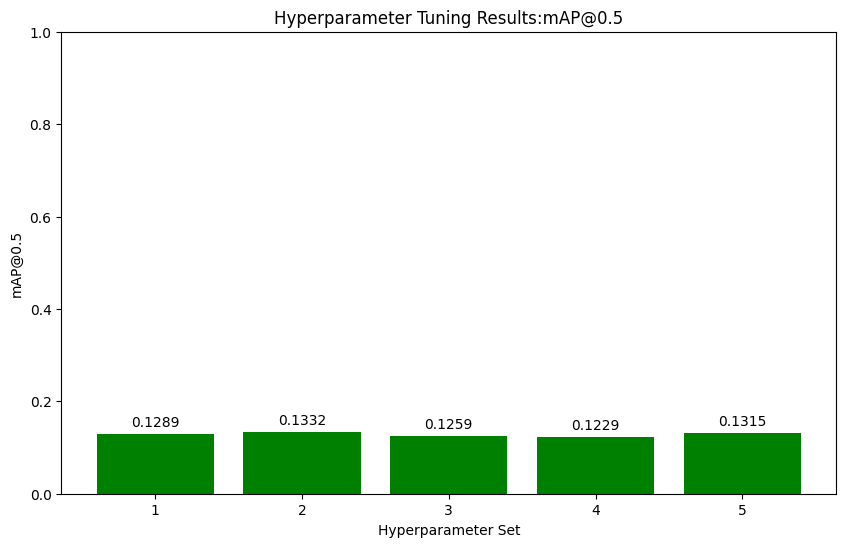

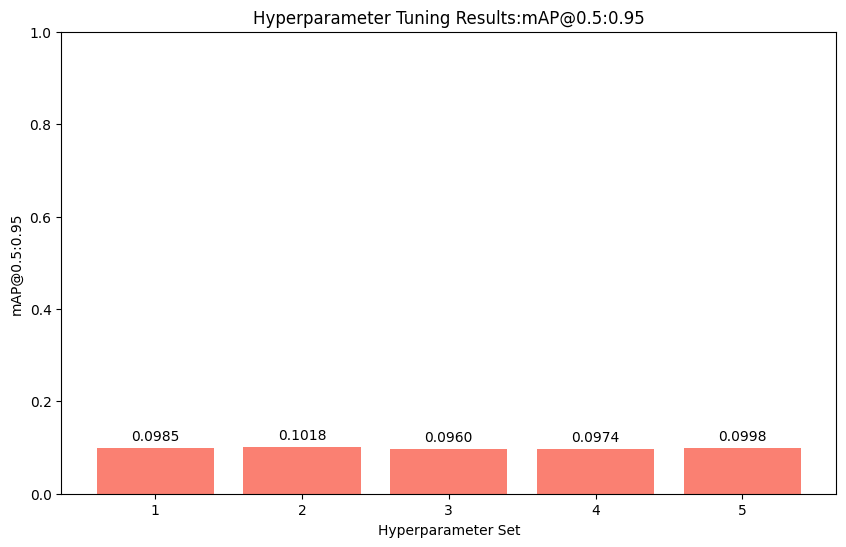

In [ ]:
def plot_results(metric_name, tuning_df, color):
    # Plot mAP@0.5:0.95 for each hyperparameter set
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(tuning_df) + 1), tuning_df[metric_name], color=color)
    plt.xlabel("Hyperparameter Set")
    plt.ylabel(metric_name)
    plt.title(f"Hyperparameter Tuning Results:{metric_name}")
    plt.xticks(range(1, len(tuning_df) + 1))
    plt.ylim(0, 1)
    for i, v in enumerate(tuning_df[metric_name]):
        plt.text(i + 1, v + 0.01, f"{v:.4f}", ha="center", va="bottom")
    plt.show()


# Display the tuning results
for idx, res in enumerate(results):
    hyp = res["hyperparameters"]
    print(f"Hyperparameter set {idx + 1}:")
    for key, value in hyp.items():
        print(f"  {key}: {value}")
    print(f"  mAP@0.5: {res['mAP@0.5']:.4f}")
    print(f"  mAP@0.5:0.95: {res['mAP@0.5:0.95']:.4f}\n")


# Create a DataFrame for plotting
tuning_df = pd.DataFrame(results)
plot_results("mAP@0.5", tuning_df, "green")
plot_results("mAP@0.5:0.95", tuning_df, "salmon")
# plot_results("F1", tuning_df, "skyblue")

In [ ]:
# Find the configuration with the highest mAP@0.5
best_result = max(results, key=lambda x: x["mAP@0.5:0.95"])

print("Best hyperparameters based on mAP@0.5:0.95:")
for key, value in best_result["hyperparameters"].items():
    print(f"  {key}: {value}")

print(f"mAP@0.5: {best_result['mAP@0.5']:.4f}")
print(f"mAP@0.5:0.95: {best_result['mAP@0.5:0.95']:.4f}")
# print(f"F1: {best_result['F1']:.4f}")

Best hyperparameters based on mAP@0.5:0.95:
  lr0: 0.005
  lrf: 0.02
  momentum: 0.9
  weight_decay: 0.0003
  warmup_epochs: 2.0
  warmup_momentum: 0.85
  warmup_bias_lr: 0.05
  box: 0.04
  cls: 0.6
  dfl: 1.2
mAP@0.5: 0.1332
mAP@0.5:0.95: 0.1018


In [ ]:
def train_final_model(
    data_yaml: str,
    model_name: str = "yolov8s-seg.pt",
    best_hyp: dict = None,
    epochs: int = 50,
    warmup_epochs: int = 5,
    freeze_layers: int = 12,
    imgsz: int = 640,
    multi_scale: bool = True,
    project: str = "runs",
    name: str = "final",
):
    """
    Trains a YOLOv8 segmentation model in two phases:
      1. Freeze backbone and train only the head for `warmup_epochs`.
      2. Load Phase 1 checkpoint, unfreeze entire model, and train for remaining epochs.

    Args:
      data_yaml:        Path to your data.yaml (with train/val splits).
      model_name:       Pretrained backbone (e.g. "yolov8n-seg.pt").
      best_hyp:         Dict of tuned hyperparameters to apply in both phases.
      epochs:           Total number of epochs to run.
      warmup_epochs:    Number of epochs for Phase 1 (head only).
      freeze_layers:    Number of backbone layers to freeze in Phase 1.
      imgsz:            Input image size.
      multi_scale:      Whether to use multi-scale training.
      project:          Root folder to save runs (e.g. "runs/segment").
      name:             Base name for the two run subfolders.

    Returns:
      metrics (dict):   Validation mAP50 & mAP50-95 after Phase 2.
      best_ckpt (str):  Path to the best checkpoint (.pt) from Phase 2.
    """

    # ----------------------
    # Phase 1: head only
    # ----------------------
    model = YOLO(model_name)
    model.train(
        data=data_yaml,
        epochs=warmup_epochs,
        imgsz=imgsz,
        freeze=freeze_layers,
        amp=True,  # Automatic Mixed Precision
        half=True,  # FP16 half precision
        multi_scale=multi_scale,
        resume=False,
        project=project,
        name=f"{name}_phase1",
        # Rich augmentations:
        mosaic=1.0,
        mixup=0.5,
        copy_paste=0.5,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        fliplr=0.5,
        flipud=0.0,
        translate=0.1,
        scale=0.5,
        shear=0.0,
        **(best_hyp or {}),
    )

    # ----------------------
    # Phase 2: full fine‑tune
    # ----------------------
    # Path to the last.pt from Phase 1
    phase1_ckpt = os.path.join(project, f"{name}_phase1", "weights", "last.pt")
    model2 = YOLO(phase1_ckpt)  # load Phase 1 weights
    model2.train(
        data=data_yaml,
        epochs=epochs - warmup_epochs,
        imgsz=imgsz,
        amp=True,
        half=True,
        multi_scale=multi_scale,
        resume=False,
        project=project,
        name=f"{name}_full",
        # Same augmentations & hypers:
        mosaic=1.0,
        mixup=0.5,
        copy_paste=0.5,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        fliplr=0.5,
        flipud=0.0,
        translate=0.1,
        scale=0.5,
        shear=0.0,
        **(best_hyp or {}),
    )

    # ----------------------
    # Validation
    # ----------------------
    val_metrics = model2.val(data=data_yaml, augment=True)

    # Pack up results
    metrics = {"mAP50": val_metrics.box.map50, "mAP50-95": val_metrics.box.map}

    best_ckpt = os.path.join(project, f"{name}_full", "weights", "best.pt")

    return metrics, best_ckpt

In [ ]:
# Best hyperparameters
best_hyperparameters = best_result["hyperparameters"]

project_path = os.path.join(base_path, "runs")

metrics, best_ckpt = train_final_model(
    data_yaml=os.path.join(base_path, "data.yaml"),
    model_name="yolov8s-seg.pt",
    best_hyp=best_hyperparameters,
    epochs=100,
    warmup_epochs=5,
    freeze_layers=12,
    imgsz=640,
    multi_scale=True,
    project=project_path,
    name="foodseg",
)
print("Validation Metrics:", metrics)
print("Best Checkpoint:", best_ckpt)

Ultralytics 8.3.128 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=0.04, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.6, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/comp4471_final/data.yaml, degrees=0.0, deterministic=True, device=1, dfl=1.2, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=12, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.02, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolov8s-seg.pt, momentum=0.9, mosaic=1.0, multi_scale=True, name=foodseg_phase1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

train: Scanning /content/drive/MyDrive/comp4471_final/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.9±2.4 ms, read: 33.8±30.4 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/comp4471_final/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/comp4471_final/runs/foodseg_phase1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0003), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/comp4471_final/runs/foodseg_phase1
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/5       8.7G   0.008463    0.02057      4.602      1.346        246        896: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]


                   all       2135      19717      0.542     0.0916       0.06     0.0427      0.554     0.0888     0.0586     0.0376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/5      9.44G   0.007587    0.01759      3.473      1.269        250        672: 100%|██████████| 312/312 [04:42<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]


                   all       2135      19717      0.533      0.137      0.105     0.0768      0.533      0.135      0.104     0.0677

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/5      9.31G   0.007186    0.01687      3.185       1.23        291        640: 100%|██████████| 312/312 [04:43<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]


                   all       2135      19717      0.534      0.155      0.134      0.101      0.544      0.152      0.131     0.0896

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/5      8.53G   0.007055    0.01661      3.065      1.213        305        864: 100%|██████████| 312/312 [04:41<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]


                   all       2135      19717      0.542      0.174      0.143      0.109      0.542      0.173       0.14     0.0968

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/5      8.84G   0.006955    0.01648      3.005      1.207        268        672: 100%|██████████| 312/312 [04:38<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]


                   all       2135      19717      0.533      0.185      0.151      0.116      0.532      0.183      0.149      0.103

5 epochs completed in 0.445 hours.
Optimizer stripped from /content/drive/MyDrive/comp4471_final/runs/foodseg_phase1/weights/last.pt, 23.9MB
Optimizer stripped from /content/drive/MyDrive/comp4471_final/runs/foodseg_phase1/weights/best.pt, 23.9MB

Validating /content/drive/MyDrive/comp4471_final/runs/foodseg_phase1/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:1 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,819,848 parameters, 0 gradients, 42.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:29,  2.27it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<00:42,  1.53it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.36it/s]


                   all       2135      19717      0.532      0.186      0.152      0.116      0.532      0.183      0.149      0.103
            background       2135       7702      0.455      0.551      0.506      0.352      0.436      0.524      0.465      0.243
                 candy         11         43          1          0     0.0494     0.0323          1          0     0.0494      0.027
              egg tart          1          3          1          0          0          0          1          0          0          0
          french fries         78         84      0.471      0.286      0.298      0.246      0.488      0.286      0.298      0.237
             chocolate         18         59          1          0     0.0372     0.0239          1          0     0.0349       0.02
               biscuit         77        107      0.195      0.383      0.217      0.182      0.189      0.365      0.196      0.153
               popcorn          4         11          1          0   

train: Scanning /content/drive/MyDrive/comp4471_final/foodseg103_yolo/train/labels.cache... 4983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4983/4983 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.1±3.6 ms, read: 24.0±27.8 MB/s, size: 85.0 KB)


val: Scanning /content/drive/MyDrive/comp4471_final/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/comp4471_final/runs/foodseg_full/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.3e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0003), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/comp4471_final/runs/foodseg_full
Starting training for 95 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/95      13.4G    0.00726     0.0173      3.194      1.239        246        896: 100%|██████████| 312/312 [05:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.15it/s]


                   all       2135      19717       0.54      0.166      0.133     0.0999      0.541      0.163       0.13      0.088

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/95      13.4G   0.006913    0.01651      2.961      1.203        250        672: 100%|██████████| 312/312 [04:58<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]


                   all       2135      19717      0.503      0.185      0.151      0.114      0.502      0.181      0.149        0.1

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/95        14G   0.006737    0.01609      2.847      1.185        291        640: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.493      0.203      0.174      0.134      0.499      0.201      0.173      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/95      13.3G   0.006644    0.01591      2.765      1.176        305        864: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.10it/s]


                   all       2135      19717      0.503      0.213       0.18      0.138      0.501      0.209      0.176      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/95      13.8G   0.006557    0.01577      2.706      1.172        268        672: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.10it/s]


                   all       2135      19717       0.49      0.227      0.195      0.148      0.492      0.223      0.192      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/95      13.1G    0.00648    0.01567      2.649      1.166        186        960: 100%|██████████| 312/312 [04:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.467      0.239      0.206       0.16      0.465      0.235      0.203       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/95      13.8G   0.006398     0.0155      2.599      1.157        219        480: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.15it/s]


                   all       2135      19717       0.52      0.237      0.211      0.161      0.524      0.233      0.208      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/95      13.4G   0.006375    0.01547      2.567      1.149        245        896: 100%|██████████| 312/312 [04:52<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.04it/s]


                   all       2135      19717      0.475      0.234      0.211      0.164      0.476      0.233      0.209      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/95      13.8G   0.006299    0.01529      2.545      1.151        154        832: 100%|██████████| 312/312 [04:59<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.10it/s]


                   all       2135      19717      0.481      0.242      0.227      0.177      0.485       0.24      0.225      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/95      14.4G   0.006236     0.0152      2.492      1.143        257        928: 100%|██████████| 312/312 [04:58<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.15it/s]


                   all       2135      19717       0.46      0.252      0.237      0.185      0.459      0.252      0.234      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/95      13.9G   0.006226    0.01527      2.488      1.143        304        416: 100%|██████████| 312/312 [04:56<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.12it/s]


                   all       2135      19717      0.511      0.265      0.245       0.19       0.52       0.26      0.242      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/95      13.7G   0.006231    0.01523      2.461       1.14        177        640: 100%|██████████| 312/312 [05:00<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.07it/s]


                   all       2135      19717      0.508      0.259      0.243       0.19      0.505      0.254      0.239      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/95      14.1G   0.006161    0.01512      2.436      1.133        226        416: 100%|██████████| 312/312 [04:56<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:33<00:00,  2.02it/s]


                   all       2135      19717       0.44      0.282      0.261      0.203      0.452       0.27      0.255      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/95      13.7G    0.00605    0.01492      2.381       1.12        279        416: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.09it/s]


                   all       2135      19717       0.46      0.284      0.267      0.208      0.469      0.279      0.263      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/95      13.3G   0.006096    0.01493      2.384      1.124        356        800: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.09it/s]


                   all       2135      19717      0.464      0.284      0.265      0.206      0.466      0.276       0.26       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/95      14.4G   0.006031    0.01493      2.358      1.123        210        576: 100%|██████████| 312/312 [04:57<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.453      0.296      0.271      0.212      0.455      0.287      0.266      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/95      13.5G   0.006056    0.01491      2.348      1.121        287        416: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.08it/s]


                   all       2135      19717      0.482      0.278      0.272      0.212      0.486      0.275      0.271      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/95      14.4G   0.005964     0.0148      2.308      1.111        228        320: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.12it/s]


                   all       2135      19717      0.519      0.286      0.273      0.212      0.519      0.286       0.27      0.188

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/95      13.7G   0.005993    0.01482      2.319      1.114        165        736: 100%|██████████| 312/312 [04:52<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.487      0.296      0.282      0.221       0.49      0.289      0.279      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/95      13.6G   0.006001     0.0149      2.305      1.114        197        320: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.14it/s]


                   all       2135      19717      0.486      0.279      0.278      0.217      0.482      0.278      0.276      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/95      14.2G   0.005916    0.01475      2.282      1.113        225        608: 100%|██████████| 312/312 [04:57<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.13it/s]


                   all       2135      19717      0.473      0.294      0.288      0.228      0.471      0.292      0.286      0.199

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/95        13G   0.005939    0.01467      2.274      1.111        262        544: 100%|██████████| 312/312 [04:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.22it/s]


                   all       2135      19717       0.46      0.308      0.291      0.226      0.459      0.308      0.288      0.199

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/95      13.1G   0.005938     0.0148      2.267      1.107        213        960: 100%|██████████| 312/312 [04:56<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.14it/s]


                   all       2135      19717       0.48      0.291      0.289      0.227      0.479      0.289      0.287      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/95        13G   0.005881     0.0147      2.246      1.104        210        640: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.12it/s]


                   all       2135      19717      0.488      0.295      0.288      0.226      0.493      0.288      0.284      0.199

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/95      14.2G   0.005891    0.01466      2.241      1.103        218        416: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.16it/s]


                   all       2135      19717      0.475       0.29      0.295      0.231       0.47      0.293      0.292      0.204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/95      13.4G   0.005838    0.01461       2.21      1.096        295        608: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]


                   all       2135      19717       0.46      0.312      0.299      0.235       0.46      0.309      0.294      0.206

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/95        13G   0.005872    0.01459       2.21      1.096        207        704: 100%|██████████| 312/312 [04:47<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.479      0.308      0.301      0.236      0.476        0.3      0.296      0.205

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/95      13.7G   0.005827    0.01457       2.21      1.102        290        576: 100%|██████████| 312/312 [04:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.482      0.302      0.302      0.239      0.484        0.3      0.298      0.209

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/95      14.5G   0.005818    0.01453      2.197      1.098        177        960: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.13it/s]


                   all       2135      19717      0.462      0.307      0.301      0.237      0.465      0.304      0.298      0.209

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/95      13.6G   0.005811    0.01455      2.184      1.096        157        512: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717      0.451      0.326      0.302      0.239      0.452      0.322      0.299      0.207

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/95      12.9G   0.005831     0.0146      2.188      1.095        271        960: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.434      0.324      0.301      0.238      0.435      0.318      0.298      0.208

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/95      13.5G   0.005812    0.01457      2.158      1.088        286        608: 100%|██████████| 312/312 [04:47<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.12it/s]


                   all       2135      19717      0.492      0.303      0.307      0.244      0.495      0.297      0.303      0.213

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/95      14.4G   0.005796    0.01448      2.155      1.087        119        416: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.438      0.315      0.305      0.242      0.435       0.31        0.3      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/95      13.6G   0.005748    0.01443      2.144      1.086        155        384: 100%|██████████| 312/312 [04:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.16it/s]


                   all       2135      19717      0.441       0.33      0.309      0.246      0.438      0.327      0.304      0.214

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/95      14.1G   0.005782    0.01447      2.145      1.088        300        736: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.479      0.323      0.308      0.245      0.476       0.32      0.305      0.215

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/95      13.8G   0.005755    0.01448      2.147      1.089        224        736: 100%|██████████| 312/312 [04:55<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.22it/s]


                   all       2135      19717      0.464      0.321      0.307      0.243      0.464      0.319      0.304      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/95      13.2G   0.005692    0.01434      2.115      1.083        241        352: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.27it/s]


                   all       2135      19717      0.494      0.313      0.317      0.253      0.503       0.31      0.314      0.219

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/95      12.5G   0.005725    0.01441      2.115      1.085        205        480: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.15it/s]


                   all       2135      19717      0.478      0.325      0.317       0.25      0.471      0.321      0.312       0.22

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/95      13.5G   0.005729    0.01444      2.106      1.083        216        640: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.484      0.321      0.314      0.249      0.481      0.318       0.31      0.217

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/95      14.2G   0.005723    0.01434        2.1      1.081        208        448: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.24it/s]


                   all       2135      19717      0.474      0.341      0.318      0.251      0.475      0.333      0.315      0.218

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/95      14.4G   0.005681    0.01439      2.086       1.08        252        736: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.16it/s]


                   all       2135      19717      0.444      0.329      0.315      0.249      0.441      0.326       0.31      0.218

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/95      13.8G   0.005738    0.01446      2.098      1.081        294        384: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.484      0.326      0.322      0.255      0.459      0.336      0.318      0.224

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/95      13.8G   0.005662    0.01431      2.082      1.081        276        320: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.461      0.322      0.321      0.256      0.479      0.316      0.317      0.222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/95      14.4G    0.00562    0.01423      2.062      1.075        223        672: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.497      0.334      0.323      0.257      0.502      0.333      0.319      0.223

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/95      13.7G   0.005617    0.01425      2.053      1.076        196        960: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.477      0.332      0.321      0.254      0.476      0.329      0.318      0.222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/95      13.6G   0.005632    0.01427      2.061      1.076        222        736: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717       0.47      0.336      0.322      0.258      0.461      0.336       0.32      0.223

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/95      14.1G   0.005605    0.01424       2.05      1.074        231        480: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.12it/s]


                   all       2135      19717      0.426       0.34      0.322      0.257      0.453      0.323       0.32      0.224

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/95      14.5G   0.005631    0.01424      2.049      1.075        166        896: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.25it/s]


                   all       2135      19717      0.445      0.339      0.323      0.254       0.46       0.33      0.318      0.221

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/95      13.3G   0.005648    0.01435      2.048      1.071        199        576: 100%|██████████| 312/312 [04:50<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717       0.45      0.337      0.324      0.257      0.448      0.333      0.321      0.223

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/95      14.1G    0.00565    0.01424      2.043      1.071        294        608: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.27it/s]


                   all       2135      19717      0.474      0.332      0.323      0.255      0.475      0.332      0.319      0.223

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/95      14.1G   0.005658    0.01434      2.042      1.076        212        864: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717      0.478       0.33      0.326      0.257      0.482      0.322      0.322      0.224

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/95      13.1G    0.00555    0.01407      2.002      1.062        284        352: 100%|██████████| 312/312 [04:46<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.451      0.335      0.328      0.261       0.46      0.323      0.325      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/95      14.5G   0.005611    0.01419      2.011      1.068        360        640: 100%|██████████| 312/312 [04:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.20it/s]


                   all       2135      19717      0.457      0.329      0.319      0.254      0.454      0.327      0.316       0.22

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/95        14G   0.005614    0.01426      2.012      1.065        289        608: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.11it/s]


                   all       2135      19717      0.461      0.335      0.322      0.256      0.463      0.331      0.318      0.222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/95      13.8G   0.005543     0.0141      2.001      1.065        190        320: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.447      0.343      0.329      0.263      0.448      0.342      0.326      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/95      14.2G   0.005591    0.01418      2.006      1.069        307        896: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.17it/s]


                   all       2135      19717      0.479      0.328      0.327       0.26      0.464       0.33      0.323      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/95      13.8G   0.005588    0.01419      1.995      1.067        182        736: 100%|██████████| 312/312 [04:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.467      0.327      0.329      0.262      0.478      0.315      0.324      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/95      13.7G   0.005569    0.01416      1.985      1.064        165        800: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.484      0.338      0.329      0.263      0.481      0.337      0.326      0.229

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/95      13.6G   0.005559    0.01416      1.985      1.062        267        896: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.25it/s]


                   all       2135      19717      0.487      0.333      0.333      0.268      0.486       0.33      0.331      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/95      13.6G   0.005563    0.01419       1.99      1.065        199        640: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.469      0.344      0.333      0.266      0.466      0.342       0.33      0.231

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/95      14.5G   0.005527    0.01398       1.96      1.056        248        448: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.26it/s]


                   all       2135      19717      0.507       0.33      0.333      0.265      0.512      0.328       0.33       0.23

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/95        14G   0.005534    0.01408      1.967      1.059        223        512: 100%|██████████| 312/312 [04:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.07it/s]


                   all       2135      19717      0.445       0.36      0.326      0.261      0.447      0.355      0.323      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/95      13.2G   0.005507    0.01408      1.959      1.059        200        416: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717       0.49      0.332      0.328      0.262      0.492      0.327      0.324      0.227

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/95      14.3G   0.005522    0.01404       1.95      1.057        252        736: 100%|██████████| 312/312 [04:47<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.22it/s]


                   all       2135      19717      0.469      0.349       0.33      0.265      0.477      0.344      0.327       0.23

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/95      13.9G   0.005542    0.01414       1.95      1.056        177        640: 100%|██████████| 312/312 [04:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:32<00:00,  2.07it/s]


                   all       2135      19717      0.486       0.34      0.332      0.266      0.488      0.336      0.329       0.23

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/95        14G   0.005518    0.01411      1.953      1.057        320        448: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.24it/s]


                   all       2135      19717      0.464      0.347       0.33      0.263       0.48      0.331      0.325      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/95      14.4G   0.005472    0.01403      1.935      1.055        202        768: 100%|██████████| 312/312 [04:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.25it/s]


                   all       2135      19717       0.46      0.345      0.329      0.264      0.483      0.333      0.327      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/95      13.4G   0.005555    0.01418      1.952      1.061        279        928: 100%|██████████| 312/312 [04:52<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.25it/s]


                   all       2135      19717      0.475      0.349      0.332      0.266      0.478      0.343      0.328      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/95        13G   0.005522    0.01407      1.941      1.056        204        544: 100%|██████████| 312/312 [04:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.483      0.341      0.332      0.267      0.483      0.341      0.328      0.231

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/95      13.6G   0.005466    0.01392      1.924      1.053        170        896: 100%|██████████| 312/312 [04:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.23it/s]


                   all       2135      19717      0.461      0.351      0.333      0.268       0.47      0.341       0.33      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/95      14.2G   0.005463     0.0139      1.908      1.052        264        608: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717       0.48      0.333      0.336       0.27      0.484       0.33      0.333      0.233

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/95      14.3G   0.005488     0.0141      1.932      1.056        134        480: 100%|██████████| 312/312 [04:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.20it/s]


                   all       2135      19717       0.47      0.343      0.334      0.268      0.469      0.341      0.331      0.233

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/95      13.8G   0.005442    0.01396      1.913      1.053        246        928: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.23it/s]


                   all       2135      19717      0.492      0.328      0.331      0.267      0.492      0.328       0.33      0.231

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/95      14.1G   0.005415     0.0139      1.899       1.05        294        800: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.468      0.339      0.333      0.267      0.463      0.336       0.33      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      75/95      13.6G   0.005407    0.01384      1.895       1.05        186        448: 100%|██████████| 312/312 [04:51<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717       0.52      0.321      0.331      0.266      0.518      0.319      0.329      0.231

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      76/95      13.7G    0.00542    0.01391      1.902      1.051        217        960: 100%|██████████| 312/312 [04:57<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.22it/s]


                   all       2135      19717      0.464       0.34      0.329      0.263      0.458      0.337      0.326      0.229

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      77/95      13.6G   0.005457    0.01397      1.905      1.052        269        480: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.21it/s]


                   all       2135      19717      0.452      0.345      0.331      0.266      0.458      0.338      0.328       0.23

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      78/95      13.4G   0.005422     0.0139      1.895       1.05        241        736: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717      0.473      0.337      0.333      0.268      0.478      0.335       0.33      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      79/95      13.4G   0.005404    0.01387      1.895      1.054        259        768: 100%|██████████| 312/312 [04:54<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.28it/s]


                   all       2135      19717      0.467      0.347      0.336       0.27      0.473       0.34      0.333      0.233

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      80/95      13.1G   0.005451    0.01394      1.905      1.053        174        928: 100%|██████████| 312/312 [04:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.31it/s]


                   all       2135      19717      0.491      0.338      0.338      0.271      0.489      0.331      0.334      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      81/95      13.7G   0.005474    0.01405        1.9      1.054        137        672: 100%|██████████| 312/312 [04:56<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:31<00:00,  2.14it/s]


                   all       2135      19717      0.485      0.342      0.338      0.272      0.483       0.34      0.334      0.235

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      82/95      12.9G   0.005446      0.014        1.9      1.055        332        640: 100%|██████████| 312/312 [04:57<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.22it/s]


                   all       2135      19717      0.469      0.345      0.338      0.272      0.466      0.346      0.334      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      83/95      13.5G   0.005435    0.01393      1.893      1.049        206        960: 100%|██████████| 312/312 [04:47<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:29<00:00,  2.29it/s]


                   all       2135      19717       0.47      0.347      0.337      0.272      0.471      0.344      0.334      0.236

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      84/95        14G   0.005393    0.01382       1.87      1.044        257        640: 100%|██████████| 312/312 [04:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.18it/s]


                   all       2135      19717      0.464      0.345      0.336      0.271      0.473      0.341      0.333      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      85/95      14.2G   0.005385    0.01387      1.878      1.047        158        416: 100%|██████████| 312/312 [04:50<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.17it/s]


                   all       2135      19717      0.464      0.346      0.337      0.272      0.461      0.344      0.334      0.235
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      86/95      11.4G   0.004362    0.01008      1.441     0.9554         55        448: 100%|██████████| 312/312 [02:17<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.33it/s]


                   all       2135      19717      0.469      0.336      0.331      0.265      0.469      0.335      0.328       0.23

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      87/95        11G   0.004216   0.009494      1.303     0.9402         78        704: 100%|██████████| 312/312 [02:17<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.38it/s]


                   all       2135      19717      0.475      0.341      0.335      0.269      0.478      0.335      0.332      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      88/95      11.2G    0.00418   0.009369      1.277     0.9346         64        480: 100%|██████████| 312/312 [02:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.39it/s]


                   all       2135      19717       0.48      0.345      0.338      0.271       0.48      0.338      0.333      0.235

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      89/95      11.5G   0.004157   0.009292      1.254     0.9323         67        608: 100%|██████████| 312/312 [02:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.39it/s]


                   all       2135      19717      0.498      0.339      0.339      0.272       0.49      0.337      0.334      0.236

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      90/95      10.8G   0.004103   0.009233      1.236      0.928         61        800: 100%|██████████| 312/312 [02:15<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.36it/s]


                   all       2135      19717      0.482      0.347      0.338      0.272      0.475      0.347      0.334      0.236

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      91/95      11.3G   0.004095   0.009189      1.218     0.9201         64        576: 100%|██████████| 312/312 [02:10<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.37it/s]


                   all       2135      19717      0.486      0.344      0.339      0.273      0.488      0.341      0.335      0.237

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      92/95      11.4G   0.004123   0.009209      1.228     0.9301         66        800: 100%|██████████| 312/312 [02:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.37it/s]


                   all       2135      19717      0.488      0.341      0.339      0.273      0.488      0.339      0.335      0.237

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      93/95      10.7G   0.004094   0.009155      1.214     0.9262         77        320: 100%|██████████| 312/312 [02:17<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.34it/s]


                   all       2135      19717      0.479      0.345       0.34      0.274      0.472      0.345      0.336      0.238

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      94/95        12G   0.004099    0.00917      1.212     0.9292         64        352: 100%|██████████| 312/312 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.32it/s]


                   all       2135      19717      0.479      0.345      0.341      0.275      0.482      0.342      0.338       0.24

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      95/95      10.9G   0.004072   0.009098      1.193     0.9224         46        672: 100%|██████████| 312/312 [02:12<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:28<00:00,  2.39it/s]


                   all       2135      19717      0.479      0.347      0.339      0.273      0.478      0.343      0.336      0.238

95 epochs completed in 8.172 hours.
Optimizer stripped from /content/drive/MyDrive/comp4471_final/runs/foodseg_full/weights/last.pt, 23.9MB
Optimizer stripped from /content/drive/MyDrive/comp4471_final/runs/foodseg_full/weights/best.pt, 23.9MB

Validating /content/drive/MyDrive/comp4471_final/runs/foodseg_full/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:1 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,819,848 parameters, 0 gradients, 42.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/67 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 1/67 [00:00<00:27,  2.37it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/67 [00:01<01:05,  1.01s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:30<00:00,  2.19it/s]


                   all       2135      19717       0.48      0.345      0.341      0.275      0.483      0.341      0.338       0.24
            background       2135       7702      0.701      0.588      0.633      0.474      0.691      0.568      0.601      0.358
                 candy         11         43      0.436     0.0465      0.137      0.104      0.465     0.0465      0.138     0.0802
              egg tart          1          3          0          0     0.0294     0.0294          0          0     0.0294     0.0247
          french fries         78         84      0.585      0.607      0.564      0.475      0.588      0.595      0.565      0.438
             chocolate         18         59       0.73      0.458      0.523      0.423      0.755      0.458      0.522      0.366
               biscuit         77        107      0.447      0.383      0.426      0.381      0.451      0.383       0.42      0.348
               popcorn          4         11      0.715      0.545   

val: Scanning /content/drive/MyDrive/comp4471_final/foodseg103_yolo/val/labels.cache... 2135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2135/2135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/134 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|          | 1/134 [00:42<1:34:06, 42.46s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   1%|▏         | 2/134 [00:42<39:08, 17.79s/it]  

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   2%|▏         | 3/134 [00:43<21:58, 10.07s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 4/134 [00:45<14:36,  6.74s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▎         | 5/134 [00:45<09:30,  4.42s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 6/134 [00:46<06:22,  2.99s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5%|▌         | 7/134 [00:46<04:22,  2.07s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   6%|▌         | 8/134 [00:46<03:04,  1.46s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   7%|▋         | 9/134 [00:46<02:12,  1.06s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   7%|▋         | 10/134 [00:46<01:36,  1.28it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 11/134 [00:46<01:12,  1.69it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   9%|▉         | 12/134 [00:46<00:55,  2.19it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  10%|▉         | 13/134 [00:47<00:44,  2.74it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  10%|█         | 14/134 [00:47<00:36,  3.27it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 15/134 [00:47<00:31,  3.83it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  12%|█▏        | 16/134 [00:47<00:27,  4.36it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  13%|█▎        | 17/134 [00:47<00:24,  4.78it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  13%|█▎        | 18/134 [00:47<00:22,  5.12it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 19/134 [00:48<00:21,  5.37it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▍        | 20/134 [00:48<00:20,  5.62it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  16%|█▌        | 21/134 [00:48<00:19,  5.86it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  16%|█▋        | 22/134 [00:48<00:19,  5.79it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 23/134 [00:48<00:20,  5.52it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  18%|█▊        | 24/134 [00:49<00:20,  5.48it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  19%|█▊        | 25/134 [00:49<00:19,  5.53it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  19%|█▉        | 26/134 [00:49<00:19,  5.68it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 27/134 [00:49<00:18,  5.76it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  21%|██        | 28/134 [00:49<00:19,  5.51it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 29/134 [00:49<00:19,  5.53it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 30/134 [00:50<00:18,  5.56it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  23%|██▎       | 31/134 [00:50<00:18,  5.44it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  24%|██▍       | 32/134 [00:50<00:18,  5.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▍       | 33/134 [00:50<00:17,  5.62it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▌       | 34/134 [00:50<00:18,  5.52it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  26%|██▌       | 35/134 [00:50<00:17,  5.63it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  27%|██▋       | 36/134 [00:51<00:17,  5.68it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  28%|██▊       | 37/134 [00:51<00:17,  5.57it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  28%|██▊       | 38/134 [00:51<00:17,  5.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▉       | 39/134 [00:51<00:17,  5.49it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  30%|██▉       | 40/134 [00:51<00:16,  5.54it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  31%|███       | 41/134 [00:52<00:16,  5.67it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  31%|███▏      | 42/134 [00:52<00:15,  5.77it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  32%|███▏      | 43/134 [00:52<00:15,  5.82it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 44/134 [00:52<00:15,  5.78it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  34%|███▎      | 45/134 [00:52<00:15,  5.80it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  34%|███▍      | 46/134 [00:52<00:15,  5.83it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  35%|███▌      | 47/134 [00:53<00:15,  5.71it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  36%|███▌      | 48/134 [00:53<00:14,  5.77it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  37%|███▋      | 49/134 [00:53<00:14,  5.72it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  37%|███▋      | 50/134 [00:53<00:14,  5.78it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  38%|███▊      | 51/134 [00:53<00:14,  5.84it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  39%|███▉      | 52/134 [00:53<00:14,  5.79it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|███▉      | 53/134 [00:54<00:13,  5.82it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 54/134 [00:54<00:13,  5.98it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  41%|████      | 55/134 [00:54<00:13,  5.88it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  42%|████▏     | 56/134 [00:54<00:13,  5.87it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  43%|████▎     | 57/134 [00:54<00:13,  5.87it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  43%|████▎     | 58/134 [00:54<00:13,  5.75it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  44%|████▍     | 59/134 [00:55<00:13,  5.76it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  45%|████▍     | 60/134 [00:55<00:13,  5.68it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  46%|████▌     | 61/134 [00:55<00:12,  5.72it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  46%|████▋     | 62/134 [00:55<00:12,  5.85it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  47%|████▋     | 63/134 [00:55<00:12,  5.74it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  48%|████▊     | 64/134 [00:56<00:12,  5.63it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  49%|████▊     | 65/134 [00:56<00:12,  5.49it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  49%|████▉     | 66/134 [00:56<00:11,  5.67it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 67/134 [00:56<00:12,  5.45it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  51%|█████     | 68/134 [00:56<00:12,  5.39it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  51%|█████▏    | 69/134 [00:56<00:12,  5.38it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  52%|█████▏    | 70/134 [00:57<00:11,  5.58it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  53%|█████▎    | 71/134 [00:57<00:11,  5.54it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  54%|█████▎    | 72/134 [00:57<00:11,  5.51it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  54%|█████▍    | 73/134 [00:57<00:11,  5.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  55%|█████▌    | 74/134 [00:57<00:10,  5.58it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  56%|█████▌    | 75/134 [00:58<00:10,  5.65it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  57%|█████▋    | 76/134 [00:58<00:10,  5.73it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  57%|█████▋    | 77/134 [00:58<00:10,  5.47it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  58%|█████▊    | 78/134 [00:58<00:09,  5.63it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  59%|█████▉    | 79/134 [00:58<00:10,  5.26it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|█████▉    | 80/134 [00:58<00:10,  5.36it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 81/134 [00:59<00:09,  5.38it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  61%|██████    | 82/134 [00:59<00:09,  5.47it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  62%|██████▏   | 83/134 [00:59<00:09,  5.55it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  63%|██████▎   | 84/134 [00:59<00:09,  5.40it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  63%|██████▎   | 85/134 [00:59<00:09,  5.35it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  64%|██████▍   | 86/134 [01:00<00:09,  5.31it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  65%|██████▍   | 87/134 [01:00<00:08,  5.26it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  66%|██████▌   | 88/134 [01:00<00:08,  5.15it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  66%|██████▋   | 89/134 [01:00<00:08,  5.18it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 90/134 [01:00<00:08,  4.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  68%|██████▊   | 91/134 [01:01<00:08,  4.87it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  69%|██████▊   | 92/134 [01:01<00:08,  4.83it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  69%|██████▉   | 93/134 [01:01<00:08,  4.92it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  70%|███████   | 94/134 [01:01<00:08,  4.89it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  71%|███████   | 95/134 [01:01<00:07,  4.98it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  72%|███████▏  | 96/134 [01:02<00:07,  5.03it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  72%|███████▏  | 97/134 [01:02<00:07,  5.04it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  73%|███████▎  | 98/134 [01:02<00:07,  4.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  74%|███████▍  | 99/134 [01:02<00:07,  4.86it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  75%|███████▍  | 100/134 [01:02<00:07,  4.83it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  75%|███████▌  | 101/134 [01:03<00:06,  4.87it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  76%|███████▌  | 102/134 [01:03<00:06,  4.86it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  77%|███████▋  | 103/134 [01:03<00:06,  4.98it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  78%|███████▊  | 104/134 [01:03<00:06,  4.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  78%|███████▊  | 105/134 [01:03<00:05,  4.98it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  79%|███████▉  | 106/134 [01:04<00:05,  4.95it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|███████▉  | 107/134 [01:04<00:05,  5.00it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  81%|████████  | 108/134 [01:04<00:05,  5.00it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  81%|████████▏ | 109/134 [01:04<00:04,  5.06it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  82%|████████▏ | 110/134 [01:04<00:04,  5.02it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83%|████████▎ | 111/134 [01:05<00:04,  5.05it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  84%|████████▎ | 112/134 [01:05<00:04,  5.04it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  84%|████████▍ | 113/134 [01:05<00:04,  4.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  85%|████████▌ | 114/134 [01:05<00:03,  5.02it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  86%|████████▌ | 115/134 [01:05<00:03,  4.99it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  87%|████████▋ | 116/134 [01:06<00:03,  5.04it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  87%|████████▋ | 117/134 [01:06<00:03,  4.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  88%|████████▊ | 118/134 [01:06<00:03,  5.06it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  89%|████████▉ | 119/134 [01:06<00:03,  4.99it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  90%|████████▉ | 120/134 [01:06<00:02,  4.97it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  90%|█████████ | 121/134 [01:07<00:02,  5.03it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  91%|█████████ | 122/134 [01:07<00:02,  4.78it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  92%|█████████▏| 123/134 [01:07<00:02,  4.90it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  93%|█████████▎| 124/134 [01:07<00:01,  5.02it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  93%|█████████▎| 125/134 [01:07<00:01,  5.28it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  94%|█████████▍| 126/134 [01:08<00:01,  5.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  95%|█████████▍| 127/134 [01:08<00:01,  5.59it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  96%|█████████▌| 128/134 [01:08<00:01,  5.70it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  96%|█████████▋| 129/134 [01:08<00:00,  5.73it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  97%|█████████▋| 130/134 [01:08<00:00,  5.83it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  98%|█████████▊| 131/134 [01:08<00:00,  5.75it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  99%|█████████▊| 132/134 [01:09<00:00,  5.85it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  99%|█████████▉| 133/134 [01:09<00:00,  5.71it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [01:09<00:00,  1.93it/s]


                   all       2135      19717       0.48      0.344      0.342      0.275      0.473      0.347      0.339       0.24
            background       2135       7702      0.702      0.587      0.633      0.473      0.672      0.574      0.601      0.358
                 candy         11         43       0.44     0.0465      0.136      0.104      0.412     0.0465      0.138     0.0799
              egg tart          1          3          0          0     0.0299     0.0299          0          0     0.0299     0.0251
          french fries         78         84      0.582      0.595      0.566      0.477      0.582      0.612      0.567      0.439
             chocolate         18         59      0.739      0.458      0.524      0.425      0.734      0.468      0.524      0.366
               biscuit         77        107      0.448      0.383      0.426      0.381      0.441      0.393      0.421      0.349
               popcorn          4         11      0.717      0.545   

In [ ]:
files.download(
    os.path.join(project_path, "foodseg_full/weights/best.pt")
)  # download best checkpoint
files.download(project_path)  # download runs directory

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(project_path)

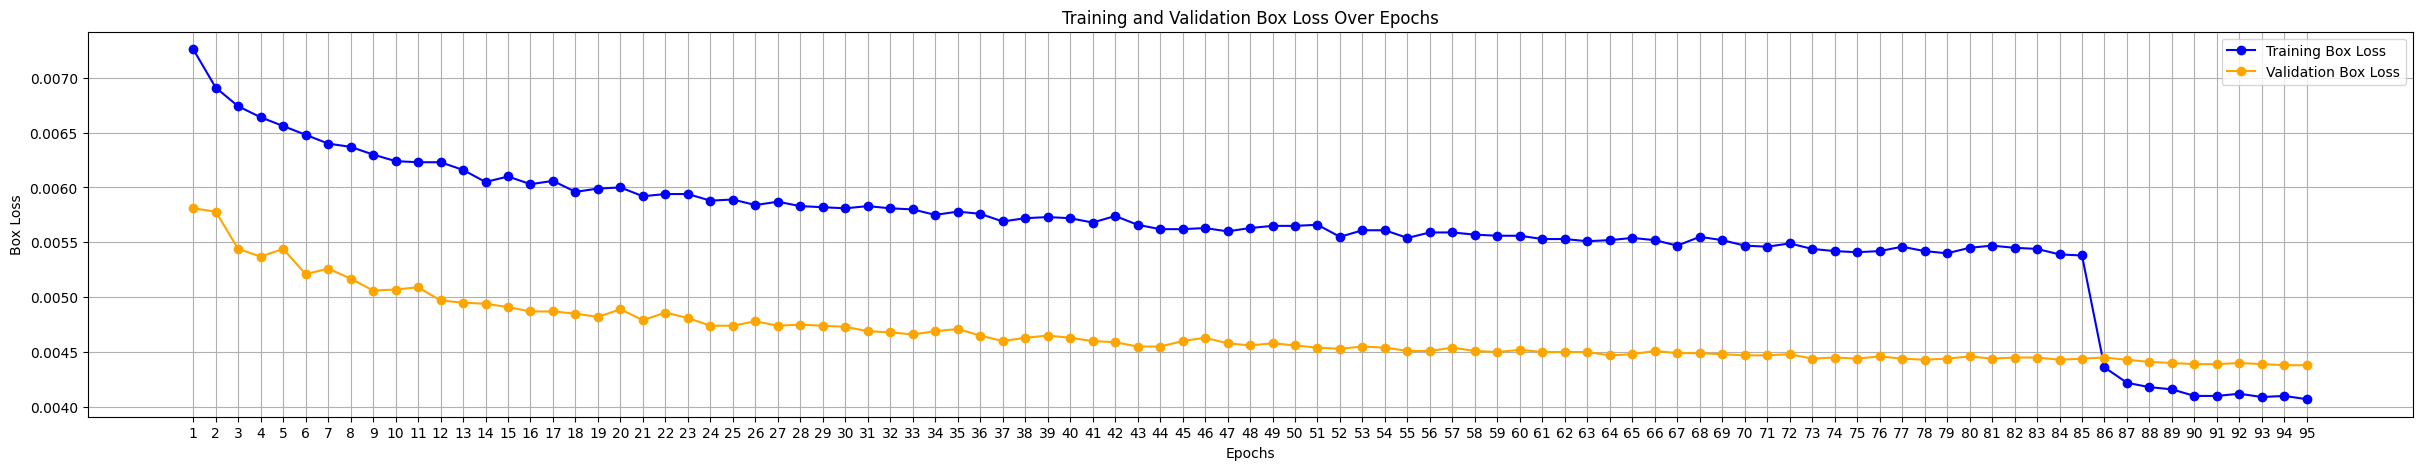

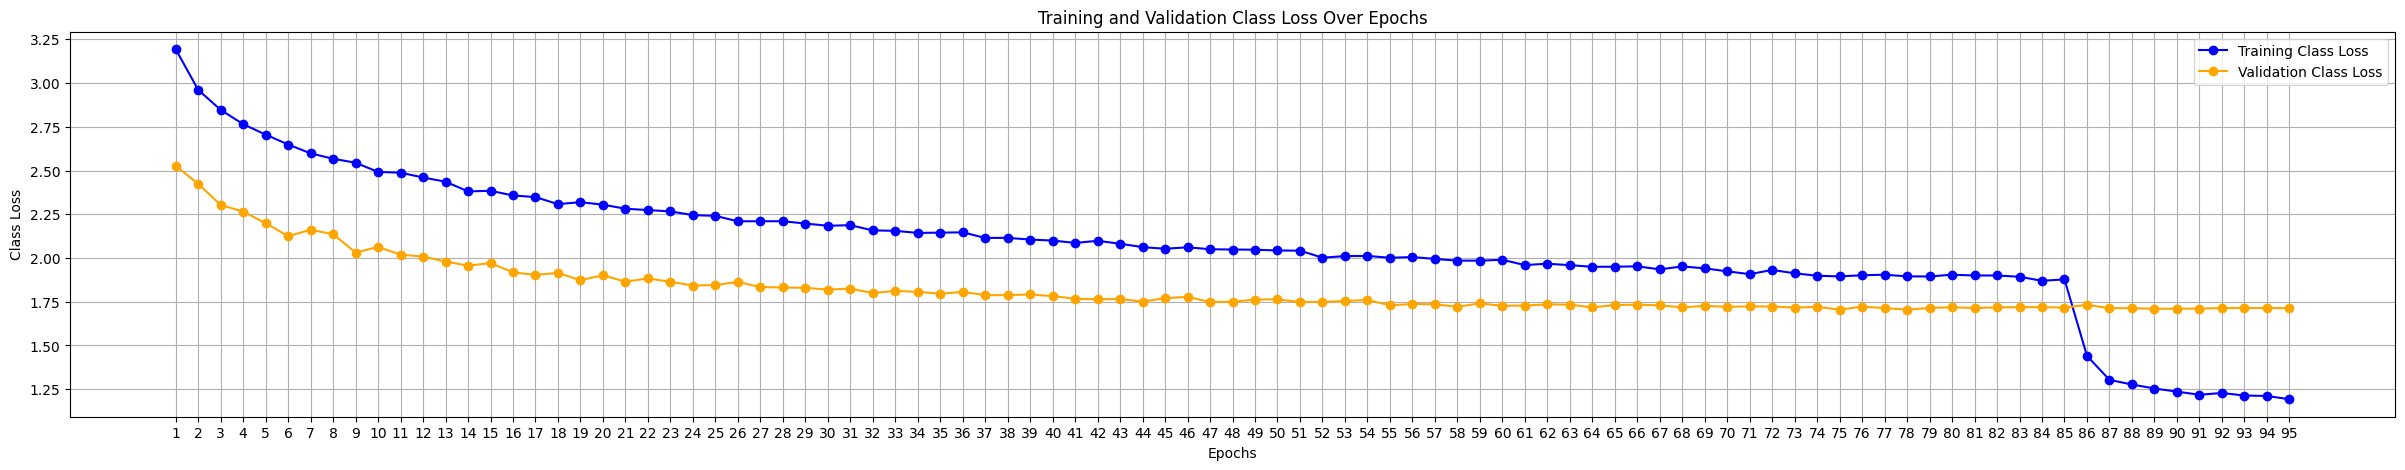

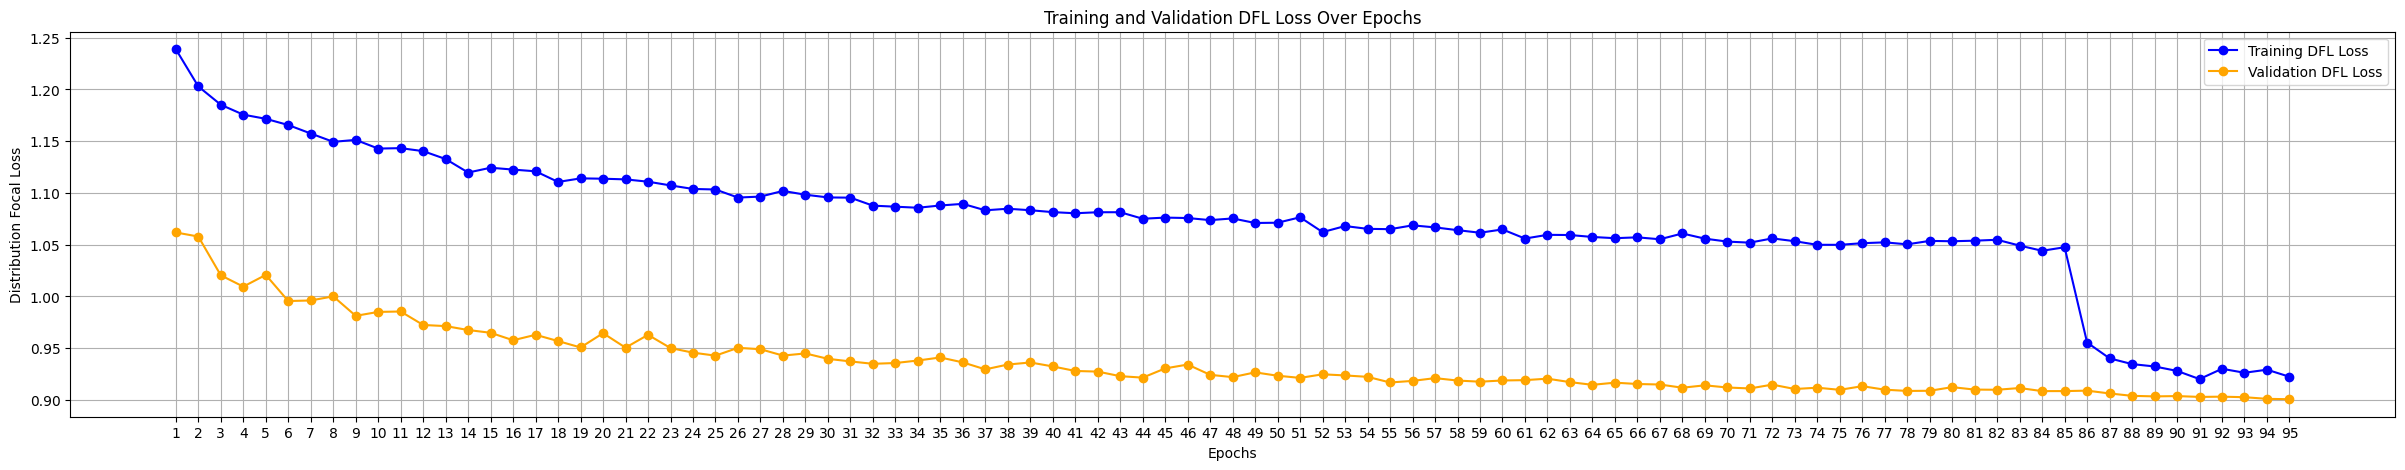

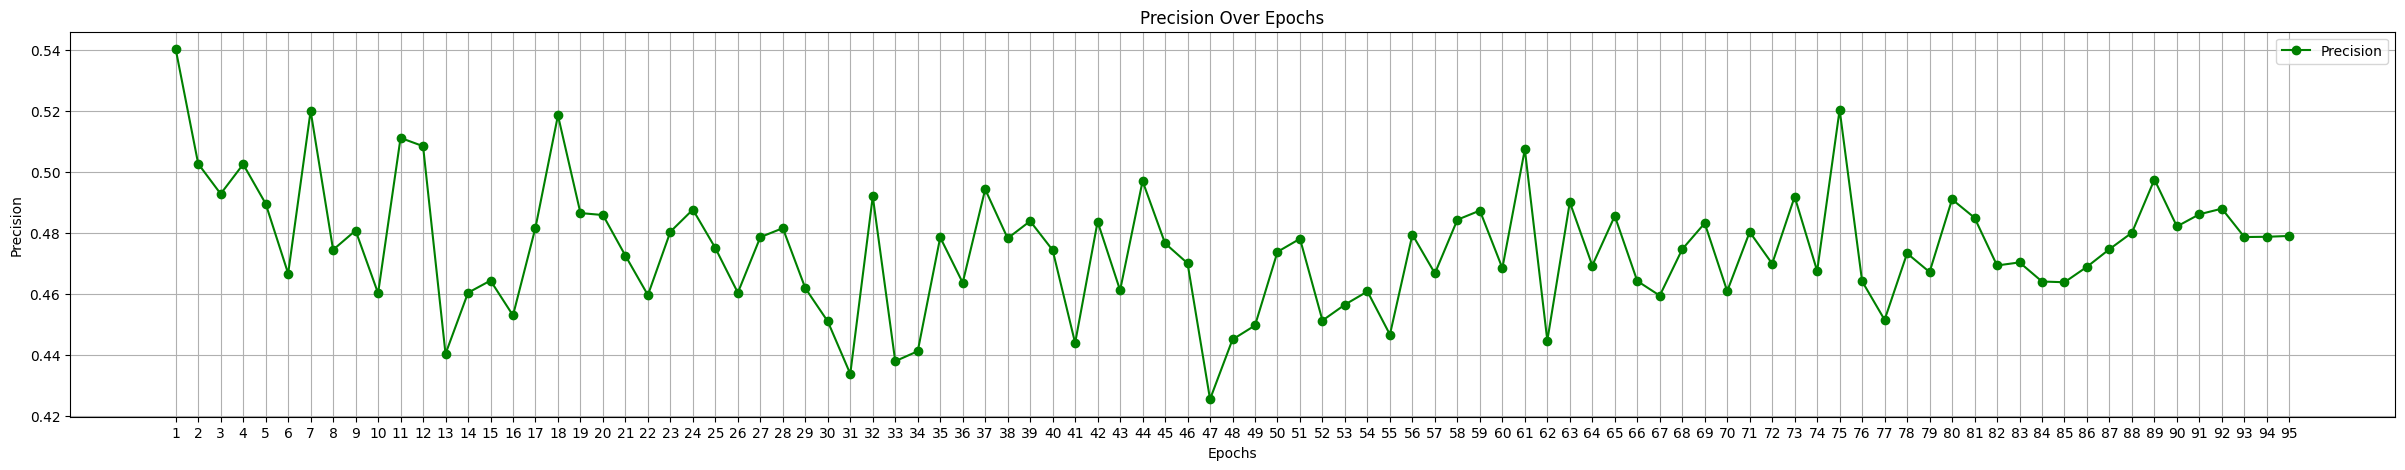

In [ ]:
# Load the results CSV
results_path = os.path.join(project_path, "foodseg_full/results.csv")
results_df = pd.read_csv(results_path)
# Extract epochs
epochs = results_df["epoch"]

# Plot for box loss
plt.figure(figsize=(30, 5))
plt.plot(
    epochs,
    results_df["train/box_loss"],
    label="Training Box Loss",
    color="blue",
    marker="o",
)
plt.plot(
    epochs,
    results_df["val/box_loss"],
    label="Validation Box Loss",
    color="orange",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Box Loss")
plt.title("Training and Validation Box Loss Over Epochs")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# Plot for class loss
plt.figure(figsize=(30, 5))
plt.plot(
    epochs,
    results_df["train/cls_loss"],
    label="Training Class Loss",
    color="blue",
    marker="o",
)
plt.plot(
    epochs,
    results_df["val/cls_loss"],
    label="Validation Class Loss",
    color="orange",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Class Loss")
plt.title("Training and Validation Class Loss Over Epochs")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# Plot for distribution focal loss
plt.figure(figsize=(30, 5))
plt.plot(
    epochs,
    results_df["train/dfl_loss"],
    label="Training DFL Loss",
    color="blue",
    marker="o",
)
plt.plot(
    epochs,
    results_df["val/dfl_loss"],
    label="Validation DFL Loss",
    color="orange",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Distribution Focal Loss")
plt.title("Training and Validation DFL Loss Over Epochs")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# Plot for precision
plt.figure(figsize=(30, 5))
plt.plot(
    epochs,
    results_df["metrics/precision(B)"],
    label="Precision",
    color="green",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Precision Over Epochs")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 95 non-null     int64  
 1   time                  95 non-null     float64
 2   train/box_loss        95 non-null     float64
 3   train/seg_loss        95 non-null     float64
 4   train/cls_loss        95 non-null     float64
 5   train/dfl_loss        95 non-null     float64
 6   metrics/precision(B)  95 non-null     float64
 7   metrics/recall(B)     95 non-null     float64
 8   metrics/mAP50(B)      95 non-null     float64
 9   metrics/mAP50-95(B)   95 non-null     float64
 10  metrics/precision(M)  95 non-null     float64
 11  metrics/recall(M)     95 non-null     float64
 12  metrics/mAP50(M)      95 non-null     float64
 13  metrics/mAP50-95(M)   95 non-null     float64
 14  val/box_loss          95 non-null     float64
 15  val/seg_loss          95 

In [ ]:
metrics = [
    "metrics/mAP50(M)",
    "metrics/mAP50-95(M)",
    "metrics/precision(M)",
    "metrics/recall(M)",
]

# Print best values and corresponding epochs
for metric in metrics:
    max_val = results_df[metric].max()
    max_epoch = results_df[results_df[metric] == max_val]["epoch"].values[0]
    print(f"Best {metric}: {max_val:.4f} at epoch {max_epoch}")

Best metrics/mAP50(M): 0.3382 at epoch 94
Best metrics/mAP50-95(M): 0.2398 at epoch 94
Best metrics/precision(M): 0.5406 at epoch 1
Best metrics/recall(M): 0.3553 at epoch 62


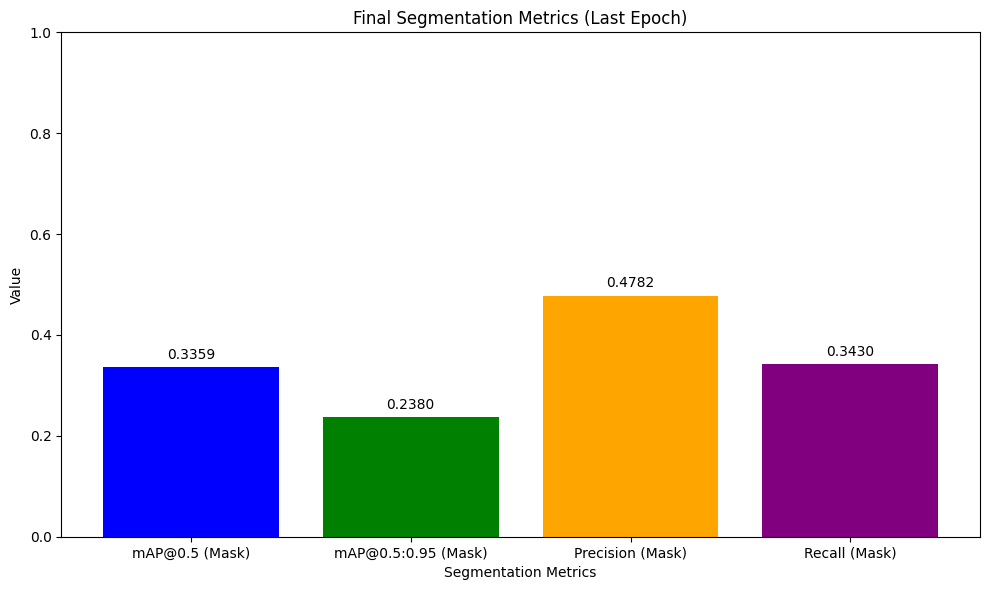

In [ ]:
# Metrics to extract and plot
metric_names = [
    "mAP@0.5 (Mask)",
    "mAP@0.5:0.95 (Mask)",
    "Precision (Mask)",
    "Recall (Mask)",
]
csv_keys = [
    "metrics/mAP50(M)",
    "metrics/mAP50-95(M)",
    "metrics/precision(M)",
    "metrics/recall(M)",
]

# Get final epoch's values (or use .max() for best overall)
final_values = results_df[csv_keys].iloc[-1].values

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, final_values, color=["blue", "green", "orange", "purple"])
plt.xlabel("Segmentation Metrics")
plt.ylabel("Value")
plt.title("Final Segmentation Metrics (Last Epoch)")
plt.ylim(0, 1)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        yval + 0.01,
        f"{yval:.4f}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

## Testing



0: 480x640 2 backgrounds, 1 steak, 1 sauce, 1 potato, 1 cucumber, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'background', 1: 'candy', 2: 'egg tart', 3: 'french fries', 4: 'chocolate', 5: 'biscuit', 6: 'popcorn', 7: 'pudding', 8: 'ice cream', 9: 'cheese butter', 10: 'cake', 11: 'wine', 12: 'milkshake', 13: 'coffee', 14: 'juice', 15: 'milk', 16: 'tea', 17: 'almond', 18: 'red beans', 19: 'cashew', 20: 'dried cranberries', 21: 'soy', 22: 'walnut', 23: 'peanut', 24: 'egg', 25: 'apple', 26: 'date', 27: 'apricot', 28: 'avocado', 29: 'banana', 30: 'strawberry', 31: 'cherry', 32: 'blueberry', 33: 'raspberry', 34: 'mango', 35: 'olives', 36: 'peach', 37: 'lemon', 38: 'pear', 39: 'fig', 40: 'pineapple', 41: 'grape', 42: 'kiwi', 43: 'melon', 44: 'orange', 45:

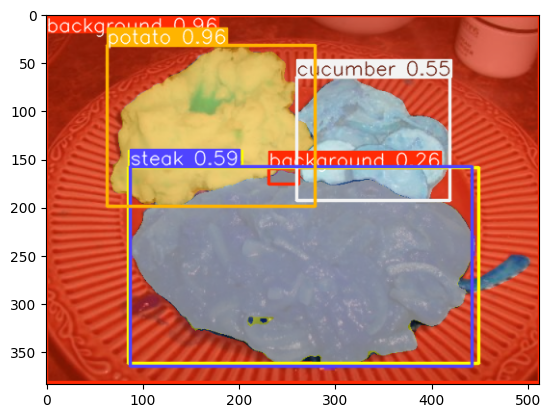

In [ ]:
image_path = (os.path.join(base_path, "foodseg103_yolo/train/images/1.jpg"),)
model = YOLO(best_ckpt)
testing_result = model(image_path)[0]
print(testing_result)
labeled_image = testing_result.plot()
plt.imshow(labeled_image)